Importing the required python modules:

In [36]:
import sklearn as sk
import sklearn.datasets
import sklearn.neighbors
import numpy as np
import matplotlib.pyplot as plt
import random 
import unittest
import time
from scipy.stats import ttest_rel

# Task 1: Generating Binary Synthetic Datasets

## (a) `make_circles` Dataset

A dataset was generated from `make_circles` with the following options: n_samples=1000, random_state=0, noise=0.2, factor =0.6, and inputs=2.

In [37]:
# Generate the first datset according to the specifications
x1_a, y1_a = sk.datasets.make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.6)

The following scatter plot was generated from this dataset:

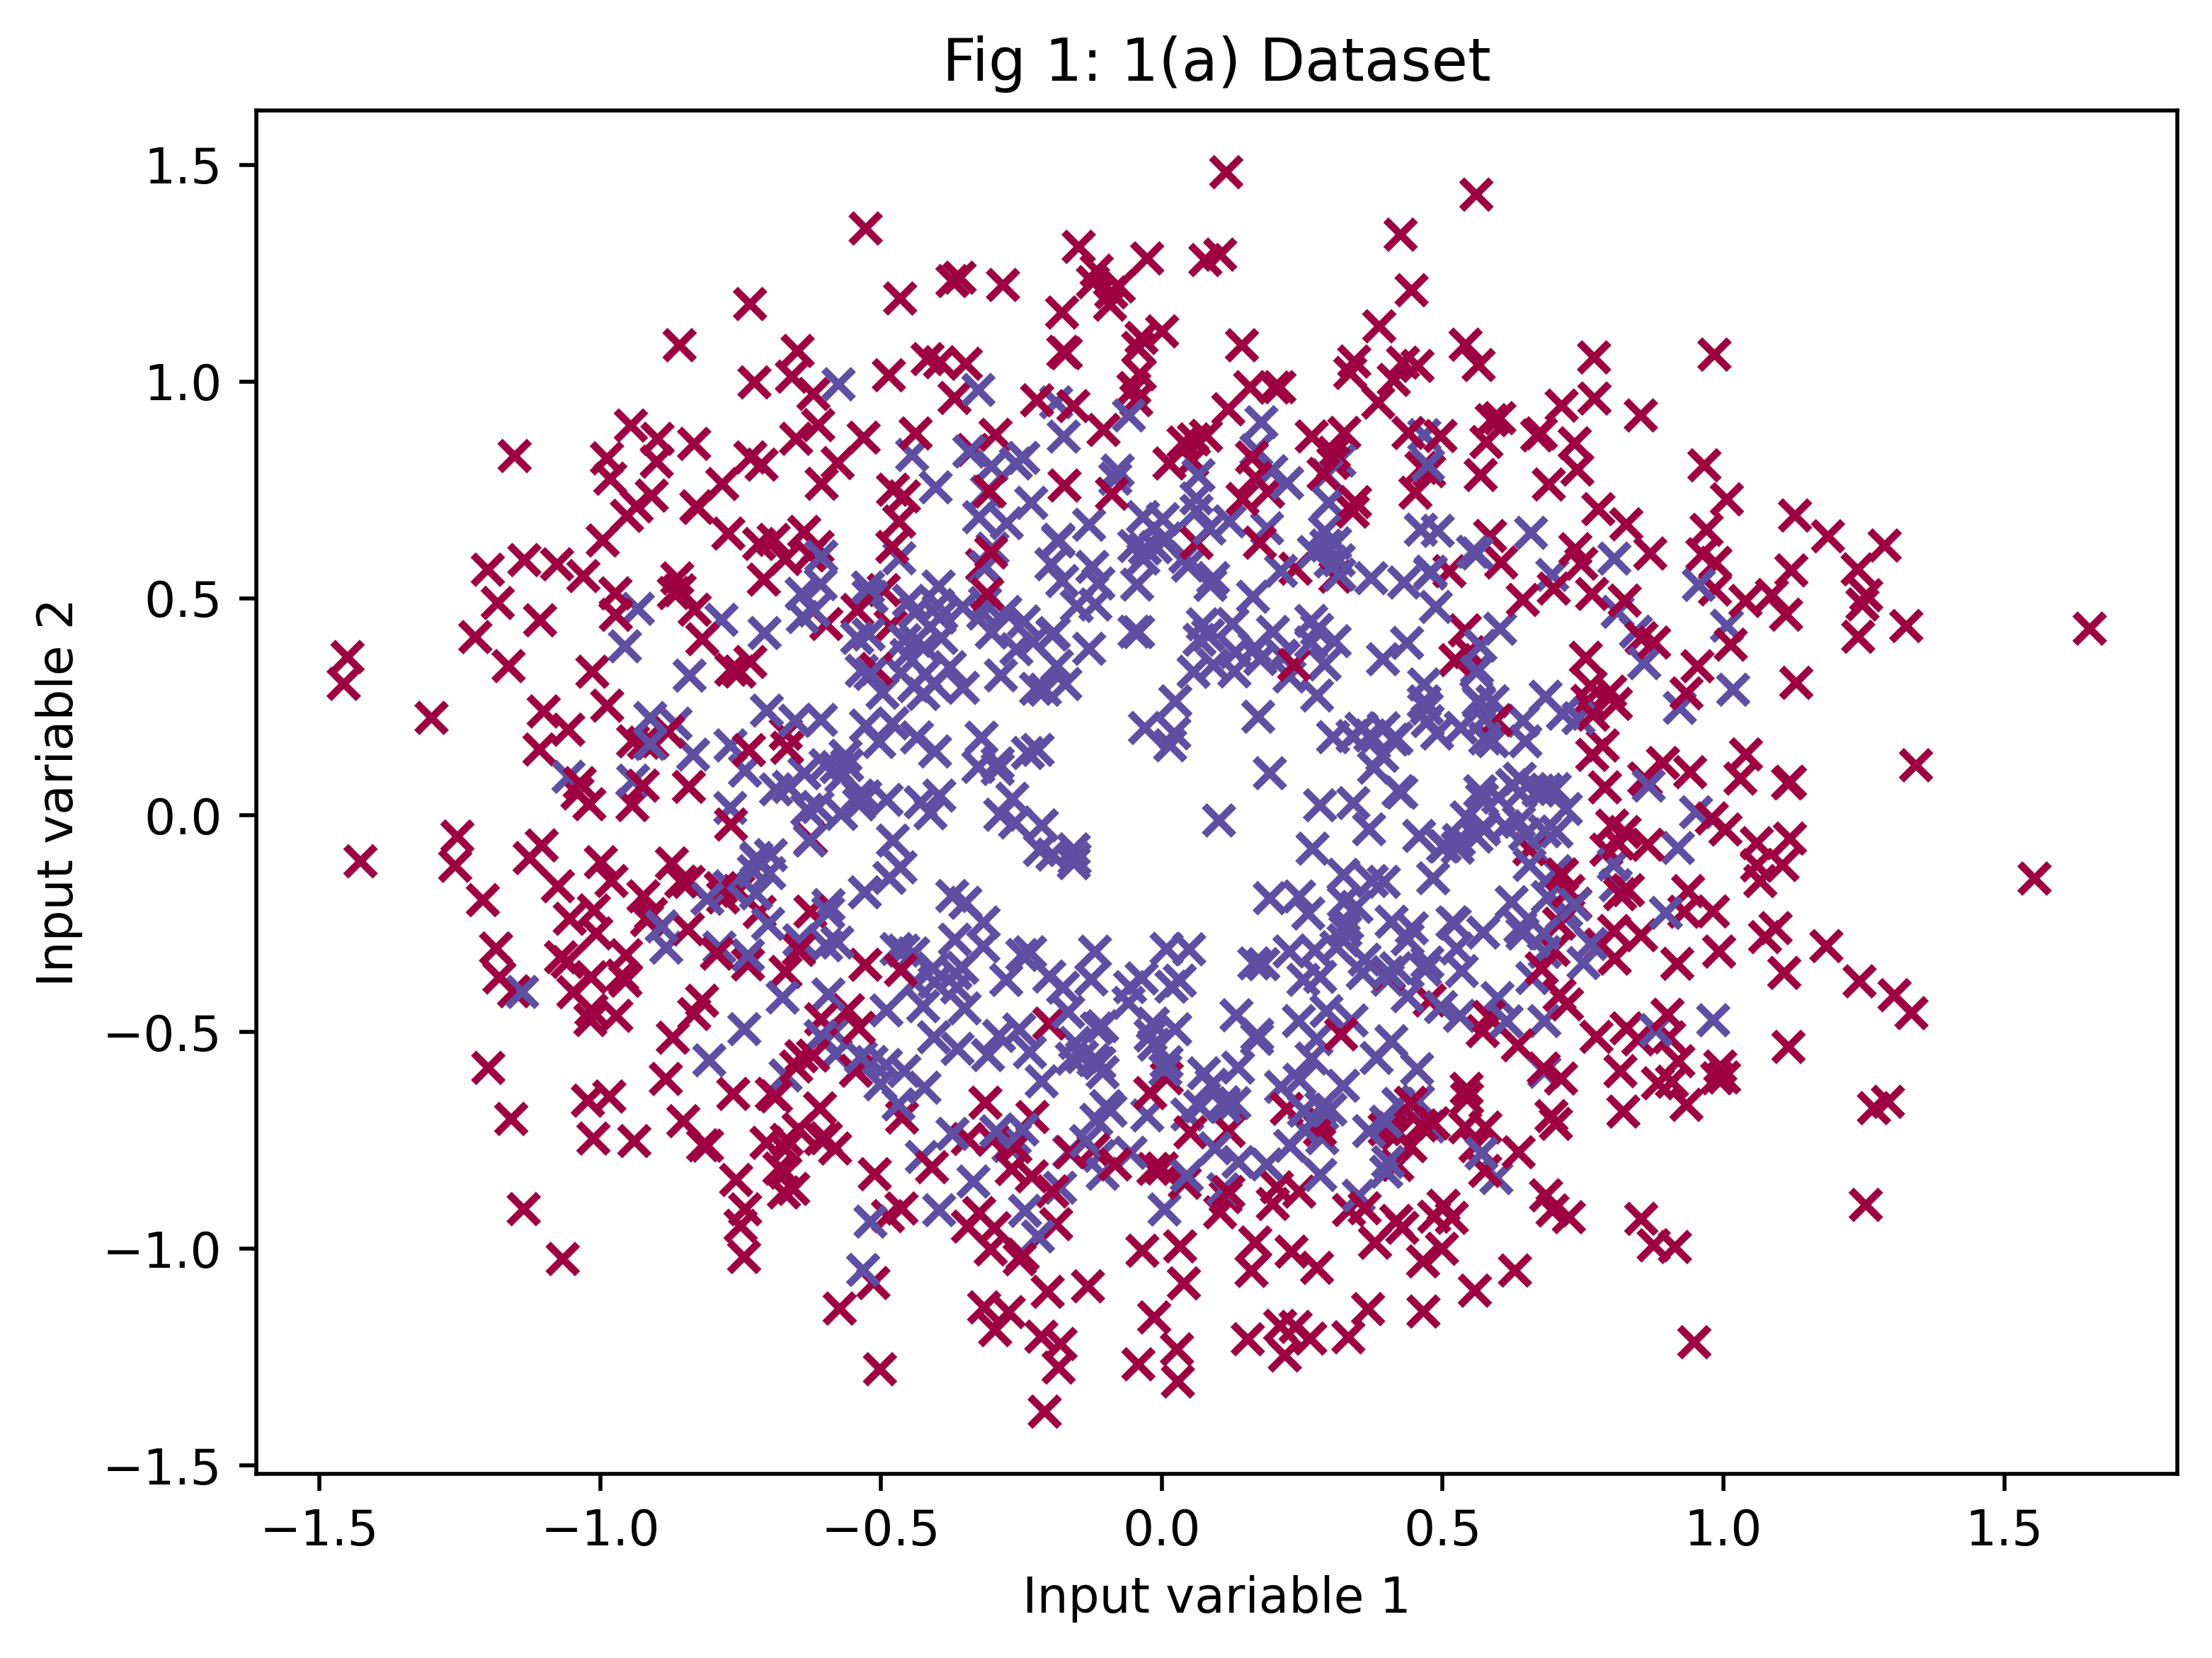

In [38]:
# Plot the dataset as a scatter plot
plt.figure(figsize=(7, 5), dpi=500)
plt.scatter(x1_a[:, 0], x1_a[:, 1], c=y1_a, cmap=plt.cm.Spectral, marker='x')
plt.title("Fig 1: 1(a) Dataset")
plt.xlabel("Input variable 1")
plt.ylabel("Input variable 2")
plt.show()

To show the distribution of the output labels of this dataset, a bargraph was generated:

The distribution of labels in 1(a) dataset is: [500 500]


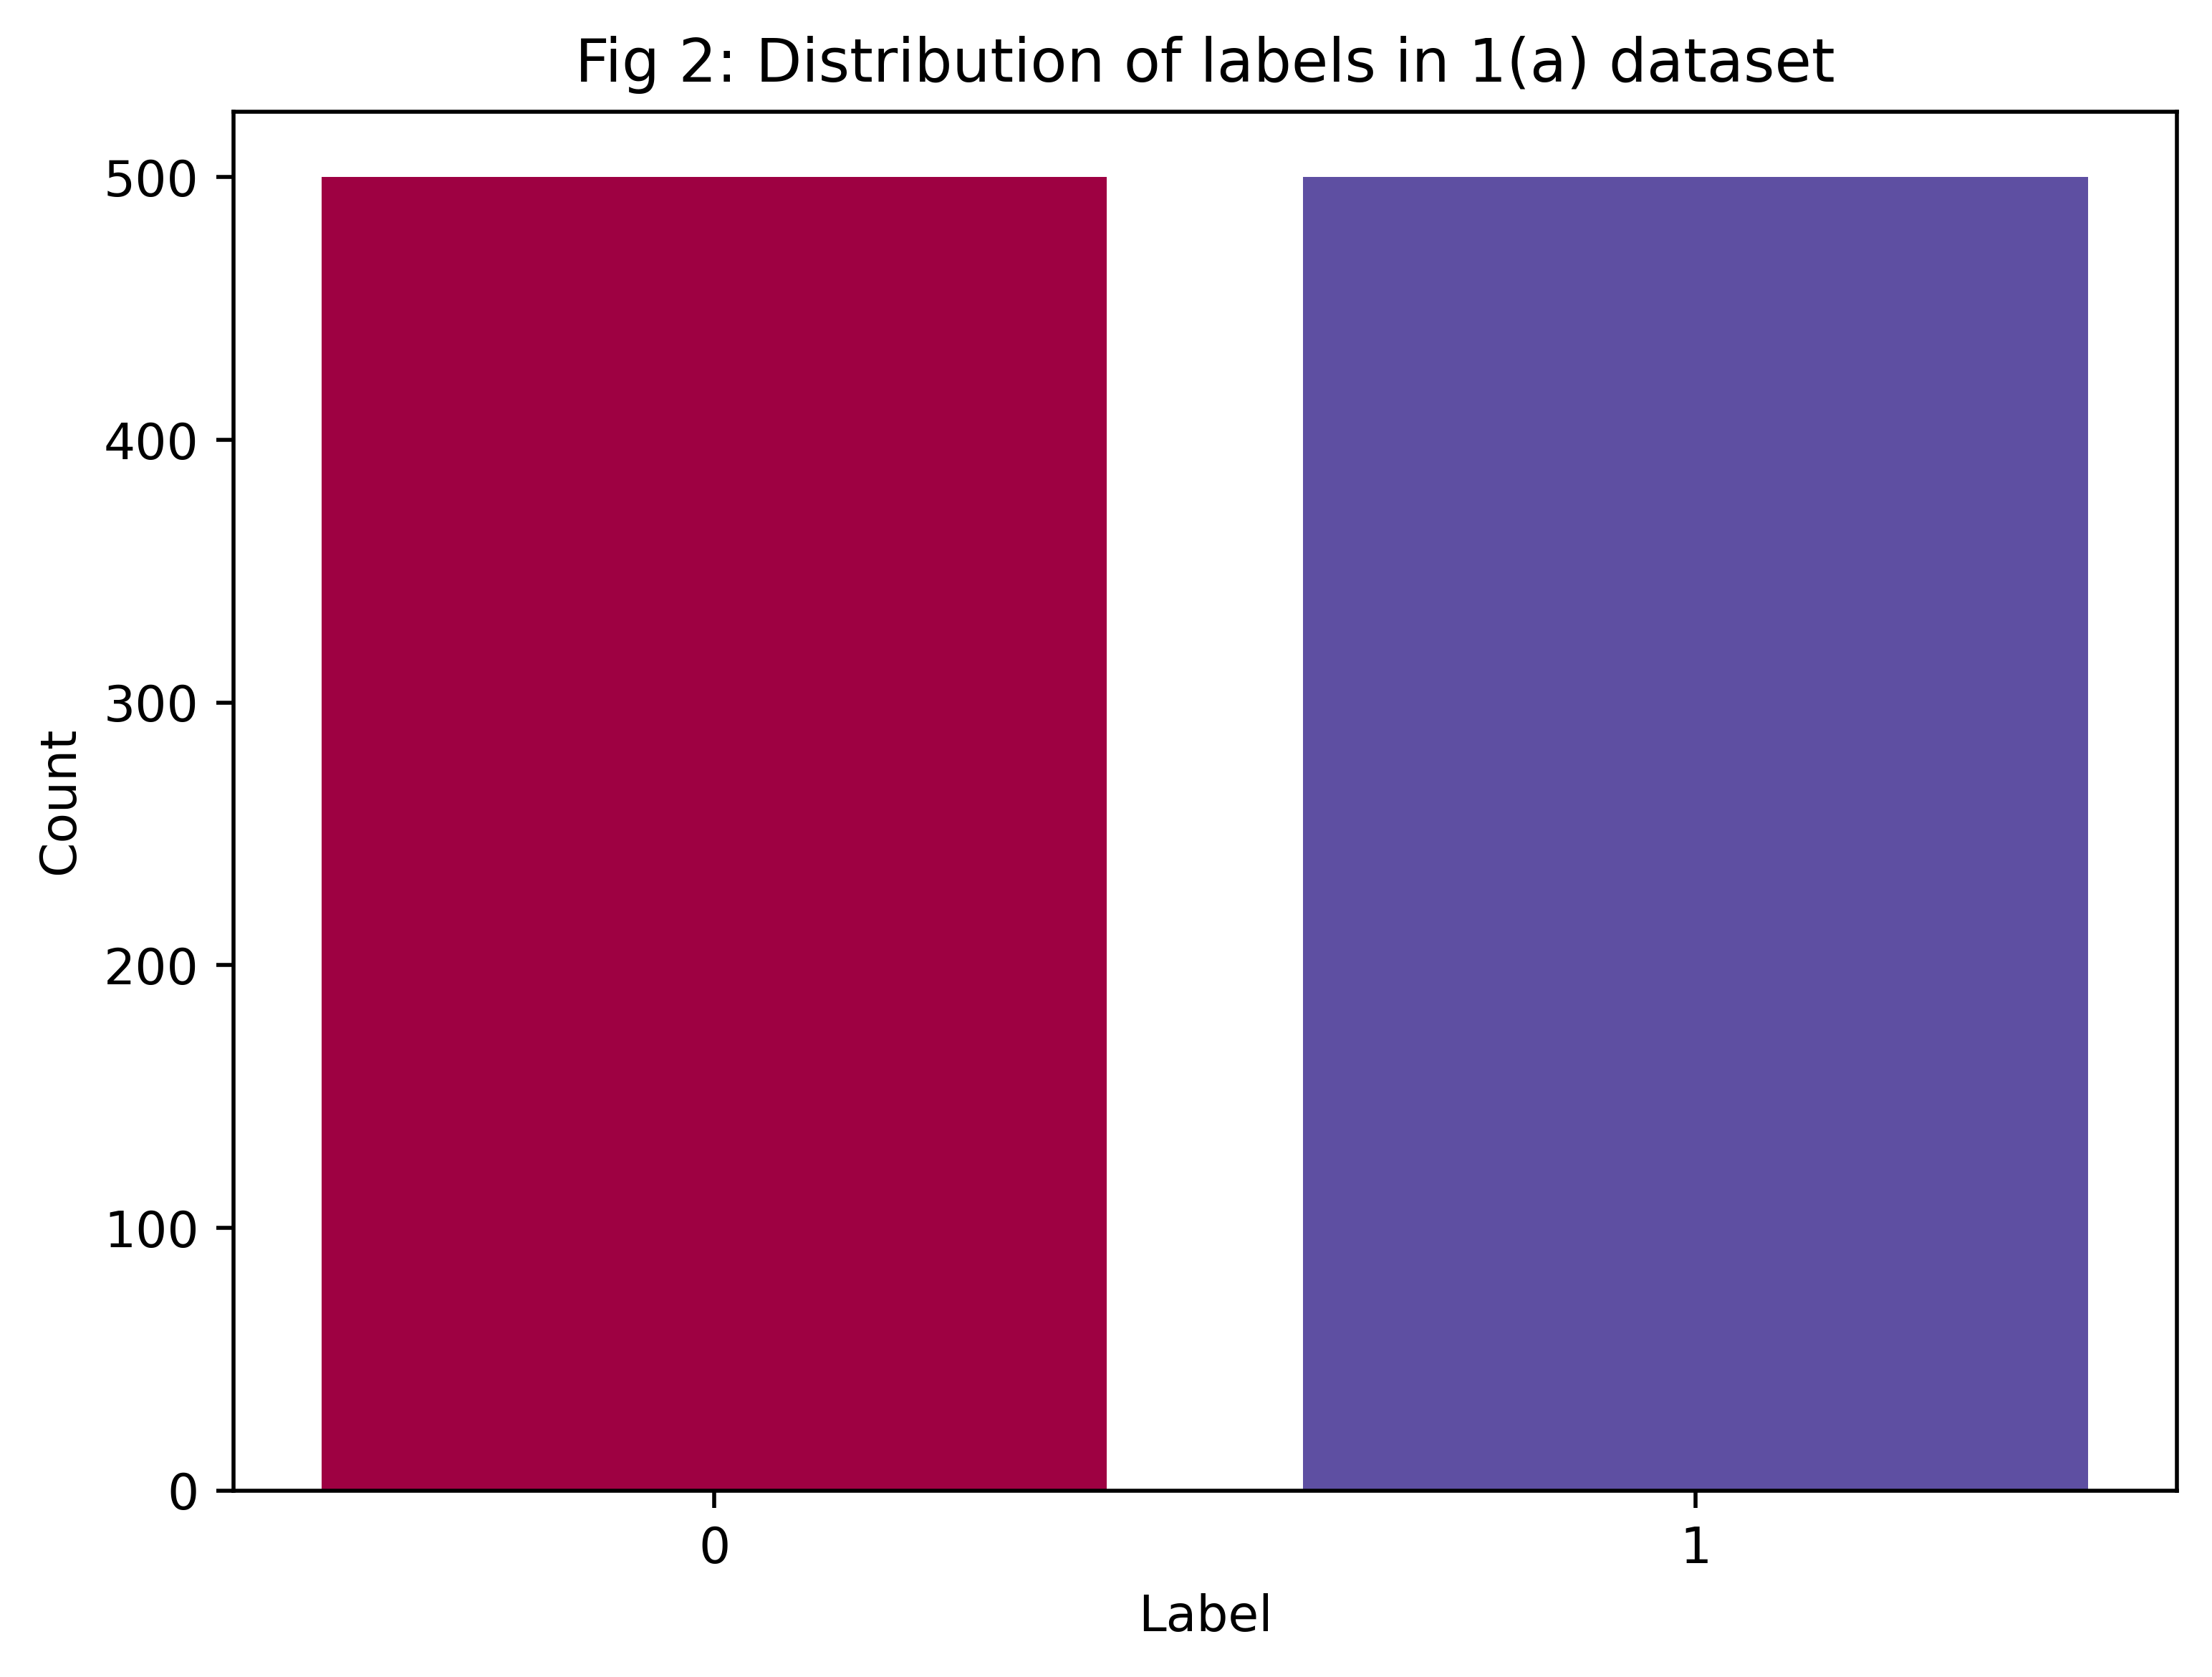

In [39]:
labels, counts = np.unique(y1_a, return_counts=True) # Get the unique labels and their counts

# Print the distribution of labels
print("The distribution of labels in 1(a) dataset is:", counts)

# Plot the distribution of labels as a bar chart
plt.figure(figsize=(7, 5), dpi=500) 
plt.bar(labels, counts, tick_label=labels, color=plt.cm.Spectral(np.linspace(0, 1, len(labels))))
plt.title('Fig 2: Distribution of labels in 1(a) dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

From Fig 2, it can be observed that the distribution of the output labels is balanced, with 500 instances for each output label.

Lastly, the mean and standard deviation of the input variables were calculated, and the results are as follows:

In [40]:
# Calculate the mean of the dataset
mean_1a = np.mean(x1_a, axis=0)

# Calculate the standard deviation of the dataset
std_dev_1b = np.std(x1_a, axis=0)

# Display the mean and standard deviation
print("Mean of input variable 1:", mean_1a[0], "\nStandard deviation of input variable 1: ", std_dev_1b[0])
print("Mean of input variable 2:", mean_1a[1], "\nStandard deviation of input variable 2: ", std_dev_1b[1])

Mean of input variable 1: 0.0024431901199145315 
Standard deviation of input variable 1:  0.6158257970105209
Mean of input variable 2: -0.002516764617150045 
Standard deviation of input variable 2:  0.6164773756351923


## (b) `make_blobs` Dataset

A dataset was generated from `make_blobs` with the following options: n_samples=1000,centers=2, cluster_std=1.0, n_features=2, random_state=0.

In [41]:
# Generate the second dataset according to the specifications
x1_b, y1_b = sk.datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.0, n_features =2, random_state=0)

The following scatter plot was generated from this dataset:

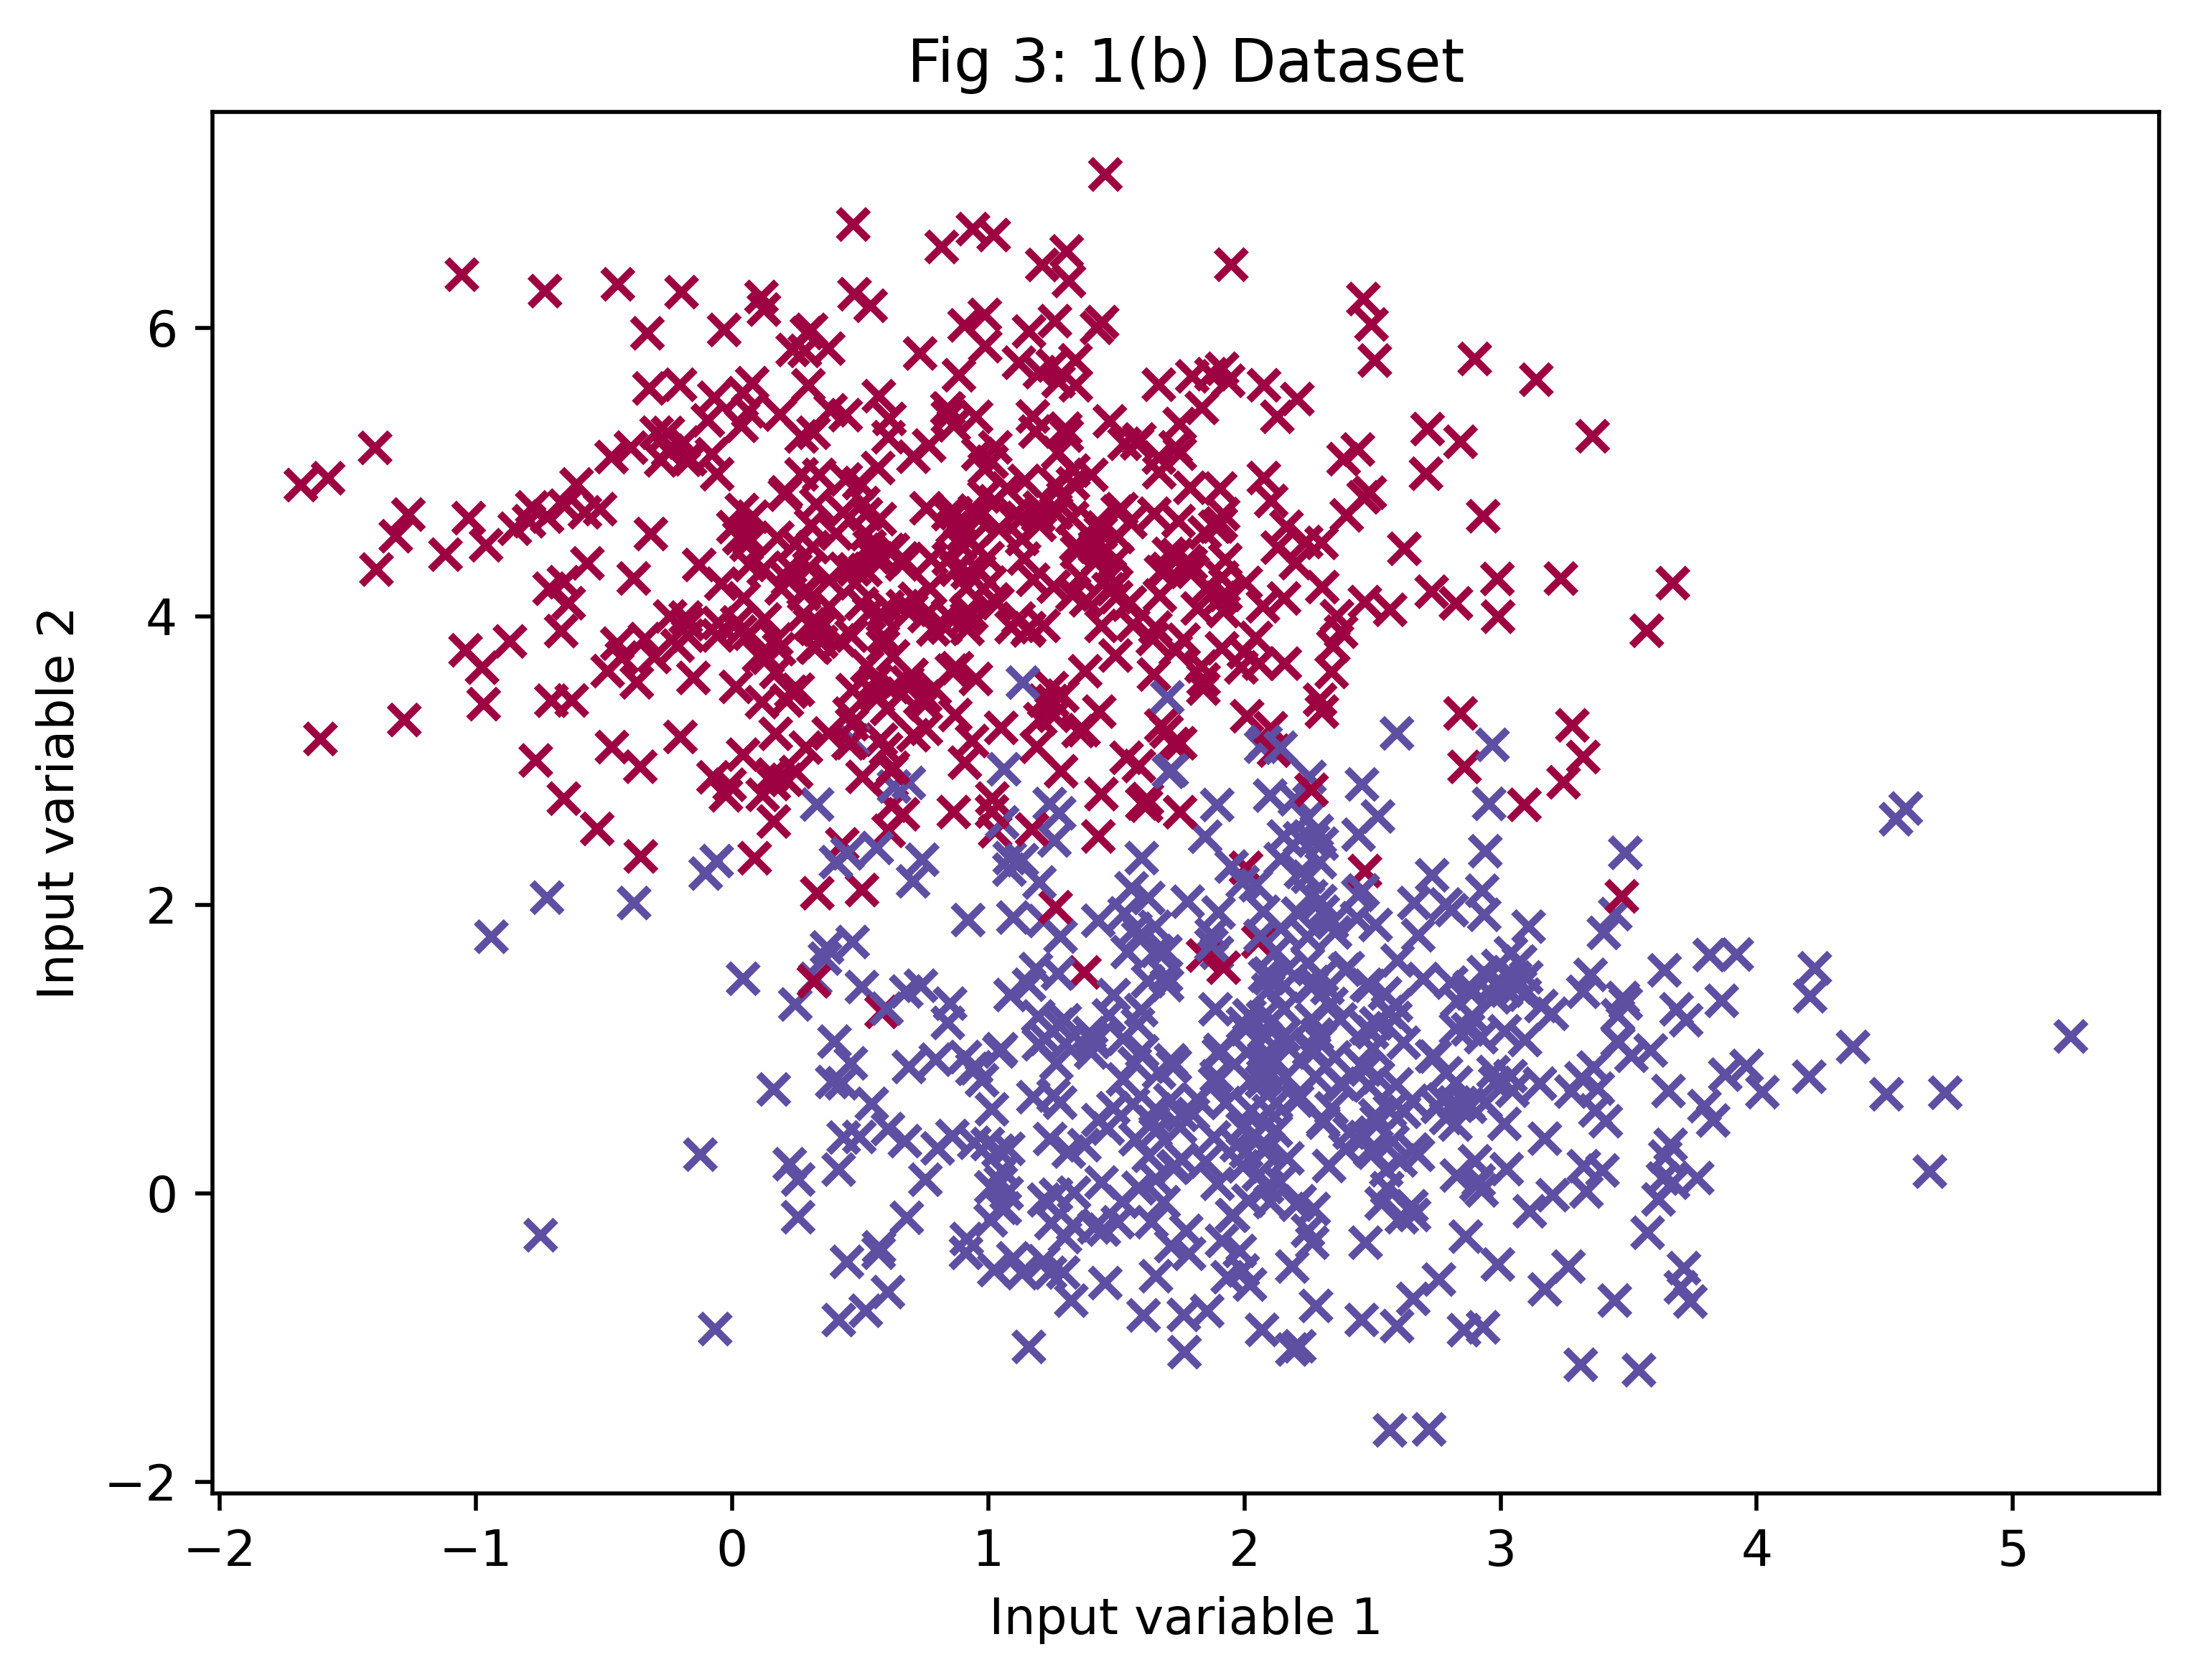

In [42]:
# Plot the dataset as a scatter plot
plt.figure(figsize=(7, 5), dpi=500)
plt.scatter(x1_b[:, 0], x1_b[:, 1], c=y1_b, cmap=plt.cm.Spectral, marker='x')
plt.title("Fig 3: 1(b) Dataset")
plt.xlabel("Input variable 1")
plt.ylabel("Input variable 2")
plt.show()

To show the distribution of the output labels of this dataset, a bargraph was generated:

The distribution of labels in 1(b) dataset is: [500 500]


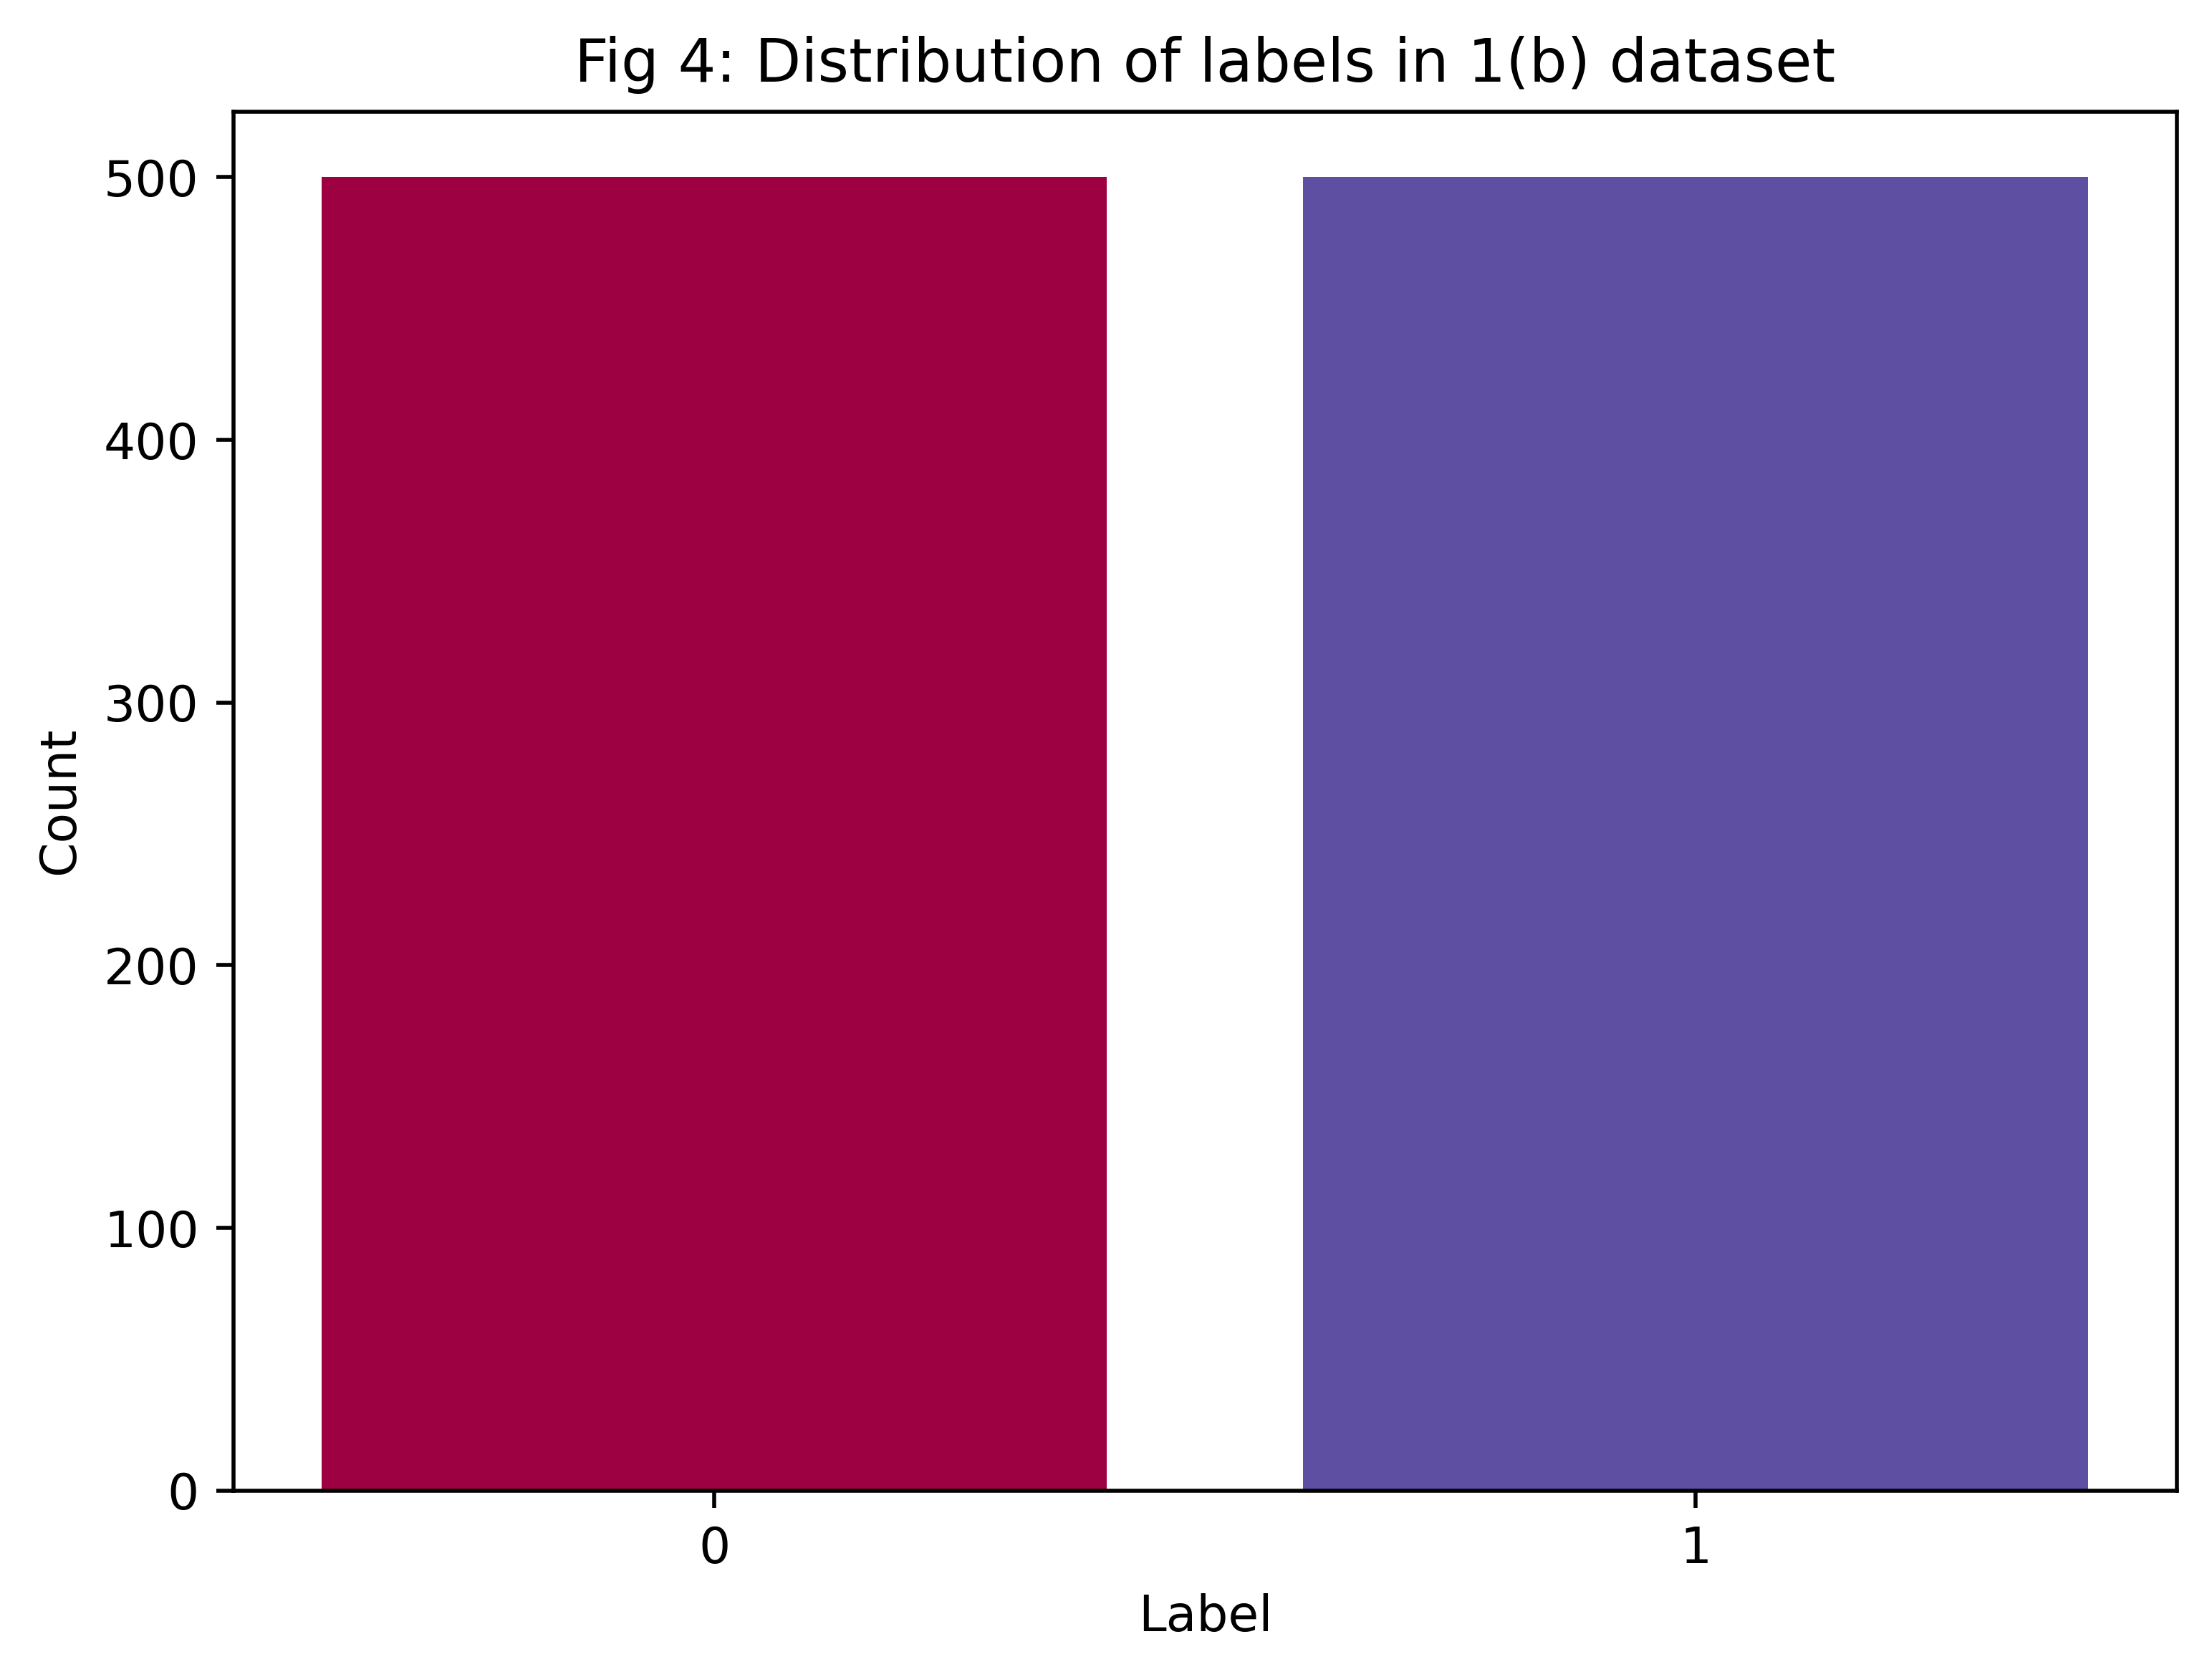

In [43]:
labels, counts = np.unique(y1_b, return_counts=True) # Get the unique labels and their counts

# Print the distribution of labels
print("The distribution of labels in 1(b) dataset is:", counts)

# Plot the distribution of labels as a bar chart
plt.figure(figsize=(7, 5), dpi=500) 
plt.bar(labels, counts, tick_label=labels, color=plt.cm.Spectral(np.linspace(0, 1, len(labels))))
plt.title('Fig 4: Distribution of labels in 1(b) dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

From Fig 4, it can be observed that the distribution of the output labels is balanced, with 500 instances for each output label.

Lastly, the mean and standard deviation of the input variables were calculated, and the results are as follows:

In [44]:
# Calculate the mean of the dataset
mean_1b = np.mean(x1_b, axis=0)

# Calculate the standard deviation of the dataset
std_dev_1b = np.std(x1_b, axis=0)

# Display the mean and standard deviation
print("Mean of input variable 1:", mean_1b[0], "\nStandard deviation of input variable 1: ", std_dev_1b[0])
print("Mean of input variable 2:", mean_1b[1], "\nStandard deviation of input variable 2: ", std_dev_1b[1])

Mean of input variable 1: 1.489802739279975 
Standard deviation of input variable 1:  1.1343317178294188
Mean of input variable 2: 2.58551081585241 
Standard deviation of input variable 2:  1.9539004315889326


# Task 2: Function Implementations

## (a) Function to Reshuffle and Split Data

The following is the implementation of the function which re-shuffles and splits a dataset into two portions:

In [45]:
def shuffle_and_split(input_var, output_labels, ratio):

    """

    Shuffles the input data and splits it into two parts.

    Parameters:
        input_var (numpy array): The input data.
        output_labels (numpy array): The output labels.
        ratio (float): The ratio at which to split the dataset.

    Returns:
        numpy array: The first part of the split dataset.
        numpy array: The second part of the split dataset.
        
    """

    # Combine the input and output data
    dataset = np.c_[input_var, output_labels]

    # Convert the dataset to a list
    dataset = dataset.tolist()

   # Perform the Knuth shuffle on the dataset 
    for i in range(len(dataset) - 1, 0, -1): # Iterate over the dataset in reverse order
        random_index = random.randint(0, i) # Generate a random index
        dataset[i], dataset[random_index] = dataset[random_index], dataset[i] # Swap the elements at the random index and the current index
    
    # Calculate where to split the dataset
    split_index = int(len(dataset) * ratio)
    
    # Split the dataset
    dataset_1 = dataset[:split_index]
    dataset_2 = dataset[split_index:]
    
    # Convert the datasets back to numpy arrays
    dataset_1, dataset_2 = np.array(dataset_1), np.array(dataset_2)
    
    return dataset_1, dataset_2

The function `shuffle_and_split` takes in a an array of input variables, an array of output labels, and a split ratio as input arguments and returns two datasets, one for training and the other for testing. The function combines the input and output arrays, and first shuffles the dataset using the Knuth shuffle algorithm and then splits it into two portions based on the split ratio. Lastly, it returns the two portions.

To test this function, the following unit tests were implemented [3]:

In [46]:
# Create a test class
class shuffle_and_split_tests(unittest.TestCase):
    def setUp(self):
        # Create a dataset for testing
        self.input_var = np.arange(200).reshape((100, 2))
        self.output_labels = np.arange(100)


    def test_shuffling_of_dataset(self):
        # Test that the dataset is shuffled
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 0.5)
        self.assertFalse(np.array_equal(first_part, np.c_[self.input_var[:50], self.output_labels[:50]])) # Check that the first part is not equal to the first half of the dataset
        self.assertFalse(np.array_equal(second_part, np.c_[self.input_var[50:], self.output_labels[50:]])) # Check that the second part is not equal to the second half of the dataset

    def test_splitting_of_dataset_in_half(self):
        # Test that the dataset is split in half
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 0.5)
        self.assertEqual(len(first_part), 50) and self.assertEqual(len(second_part), 50) 

    def test_splitting_of_dataset_in_0_8_portion(self):
        # Test that the dataset is split in 0.8 portion
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 0.8)
        self.assertEqual(len(first_part), 80) and self.assertEqual(len(second_part), 20)

    def test_splitting_of_dataset_in_0_3_portion(self):
        # Test that the dataset is split in 0.3 portion
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 0.3)
        self.assertEqual(len(first_part), 30) and self.assertEqual(len(second_part), 70)

    def test_splitting_of_dataset_in_0_portion(self):
        # Test that the dataset is split in 0 portion
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 0)
        self.assertEqual(len(first_part), 0) and self.assertEqual(len(second_part), 100)

    def test_splitting_of_dataset_in_1_portion(self):
        # Test that the dataset is split in 1 portion
        first_part, second_part = shuffle_and_split(self.input_var, self.output_labels, 1)
        self.assertEqual(len(first_part), 100) and self.assertEqual(len(second_part), 0)

    def testing_with_empty_dataset(self):
        # Test that the function works with an empty dataset
        first_part, second_part = shuffle_and_split(np.array([]), np.array([]), 0.5)
        self.assertEqual(len(first_part), 0) and self.assertEqual(len(second_part), 0)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.............
----------------------------------------------------------------------
Ran 13 tests in 0.004s

OK


## (b) Function to Calculate Binary Classification Metrics

The following is the implementation of the function which computes and returns the classification accuracy, recall, precision and F1-score for a binary classification task [2].

In [47]:
def binary_class_metrics(labels, predicted):
    
    """
    
    Calculates the accuracy, precision, recall and F1 score of a binary classification model.
    
    
    Parameters:
        labels (numpy array): The true labels.
        predicted (numpy array): The predicted labels.

    Returns:
        dict: A dictionary containing the accuracy, precision, recall and F1 score.

    """

    # Error handling
    
    if len(labels) != len(predicted): # Check if the lengths of the labels and predicted arrays are equal
        raise ValueError("The lengths of the labels and predicted arrays are not equal.")
    
    if len(np.unique(labels)) != 2 or len(np.unique(predicted)) != 2: # Check if the labels and predicted arrays are binary
        raise ValueError("The labels and predicted arrays are not binary.")
    
    if (len(labels) == 0) or (len(predicted) == 0): # Check if the labels and predicted arrays are empty
        raise ValueError("The labels and predicted arrays are empty.")

    TP = np.sum((predicted == 1) & (labels == 1)) # Calculate the number of true positives
    TN = np.sum((predicted == 0) & (labels == 0)) # Calculate the number of true negatives
    FP = np.sum((predicted == 1) & (labels == 0)) # Calculate the number of false positives
    FN = np.sum((predicted == 0) & (labels == 1)) # Calculate the number of false negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN) # Calculate the accuracy

    precision = TP / (TP + FP) # Calculate the precision

    recall = TP / (TP + FN) # Calculate the recall

    # Calculate the F1 score
    if precision + recall == 0: # Check if the denominator is zero to avoid division by zero
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall) # Calculate the F1 score

    # Return the metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}

The function `binary_classification_metrics` takes in an array of true labels and an array predicted labels as input and returns the classification accuracy, recall, precision, and F1-score as a dictionary. It first calculates the true positives, false positives, false negatives, and true negatives based, and based on these it computes the classification accuracy, recall, precision, and F1-score.

To test this function, the following unit tests were implemented [3]:

In [48]:
# Create a test class
class binary_class_metrics_tests(unittest.TestCase):

    def setUp(self):
        # Create a dataset for testing
        self.labels = np.array([1, 0, 1, 0, 1]) 
    
    # Test the function with perfect predictions
    def test_perfect_predictions(self):

        # Creating an array of perfect predictions
        predicted = np.array([1, 0, 1, 0, 1])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 1.0)
        self.assertEqual(metrics['precision'], 1.0)
        self.assertEqual(metrics['recall'], 1.0)
        self.assertEqual(metrics['f1_score'], 1.0)

    # Test the function with all incorrect predictions
    def test_all_incorrect_predictions(self):

        # Creating an array of all incorrect predictions
        predicted = np.array([0, 1, 0, 1, 0])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 0.0)
        self.assertEqual(metrics['precision'], 0.0)
        self.assertEqual(metrics['recall'], 0.0)
        self.assertEqual(metrics['f1_score'], 0.0)

    # Test the function with mixed correct and incorrect predictions
    def test_mixed_predictions(self):

        # Creating an array of mixed correct and incorrect predictions
        predicted = np.array([1, 1, 0, 0, 1])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 0.6)
        self.assertEqual(metrics['precision'], 0.6666666666666666)
        self.assertEqual(metrics['recall'], 0.6666666666666666)
        self.assertEqual(metrics['f1_score'], 0.6666666666666666)


    # Test the function with different length arrays
    def test_different_length_arrays(self):

        # Creating an array of different length
        predicted = np.array([1, 0, 1, 0])
    
        with self.assertRaises(ValueError):
            binary_class_metrics(self.labels, predicted)

    # Test the function with non-binary arrays
    def test_non_binary_arrays(self):

        # Creating an array of non-binary values
        predicted = np.array([1, 2, 1, 0, 1])

        with self.assertRaises(ValueError):
            binary_class_metrics(self.labels, predicted)

    # Test the function with an empty dataset
    def test_empty_dataset(self):

        # Creating an empty array
        labels = np.array([])
        predicted = np.array([])

        with self.assertRaises(ValueError):
            binary_class_metrics(labels, predicted)

# Running the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.............
----------------------------------------------------------------------
Ran 13 tests in 0.008s

OK


# Task 3: k-NN Models

## (a) Splitting Datasets into Training and Testing Sets

The datasets generated in Task 1 were split into training and testing sets using the `shuffle_and_split` function. The split ratio was set to 0.8. After splitting the datasets, they were further split into input and output arrays.

In [49]:
# Splitting the datsets from 1(a) and 1(b) into training and testing sets in a 80:20 ratio
train_1a, test_1a = shuffle_and_split(x1_a, y1_a, 0.8) # Split the 1(a) dataset

# Seperate the input and output variables
x_train_1a, y_train_1a = train_1a[:, :2], train_1a[:, 2]
x_test_1a, y_test_1a = test_1a[:, :2], test_1a[:, 2]


train_1b, test_1b = shuffle_and_split(x1_b, y1_b, 0.8) # Split the 1(b) dataset

# Seperate the input and output variables
x_train_1b, y_train_1b = train_1b[:, :2], train_1b[:, 2]
x_test_1b, y_test_1b = test_1b[:, :2], test_1b[:, 2]

## (b) Finding k Value to Maximize F1-Score

The following code was used to find the k value that maximizes the F1-score for the `make_circles` dataset:

In [50]:
# Splitting the dataset train and validation sets in a 80:20 ratio
train_1a, val_1a = shuffle_and_split(x_train_1a, y_train_1a, 0.8) # Split the 1(a) dataset

# Seperate the input and output variables
x_train_1a, y_train_1a = train_1a[:, :2], train_1a[:, 2]
x_val_1a, y_val_1a = val_1a[:, :2], val_1a[:, 2]

# Creating a dictionary to store the F1 scores
f1_scores_a = []

# Iterating through different values of k
for k in range(1, 25, 2): # Iterate through odd values of k from 1 to 25
    # Create a K-Nearest Neighbors classifier
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(x_train_1a, y_train_1a)
    
    # Predict the output labels
    y_pred_1a = knn.predict(x_val_1a)
    
    # Calculate the F1 score
    f1_score = binary_class_metrics(y_val_1a, y_pred_1a)['f1_score']
    
    # Add the F1 score and corresponding value of k to the dictionary
    f1_scores_a.append((k, f1_score))

# Get the value of k with the highest F1 score
best_k_f1_a, max_f1_a = max(f1_scores_a, key=lambda x: x[1])

# Print the best value of k and the corresponding F1 score
print("The best value of k is:", best_k_f1_a, "with an F1 score of:", max_f1_a)

# Retrain the classifier with the best value of k on the combined training and validation sets
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=best_k_f1_a) 
knn.fit(np.vstack((x_train_1a, x_val_1a)), np.concatenate([y_train_1a, y_val_1a]))

# Make predictions on the test set using the retrained model
y_pred_test = knn.predict(x_test_1a) 

# Calculate the F1 score on the test set
final_f1_a = binary_class_metrics(y_test_1a, y_pred_test)['f1_score'] 

print("Final F1-Score on Test Set:", final_f1_a)

The best value of k is: 23 with an F1 score of: 0.8048780487804879
Final F1-Score on Test Set: 0.8292682926829269


The test set is first split further into a training and validation set using a split ratio of 0.8. Next, the k-NN model is trained on the training set and the F1-score is calculated on the validation set for different for odd k values ranging from 1 to 25. After iterating through all of the k value, the k value that maximizes the F1-score is selected. Finally, the k-NN model is trained on the training set and tested on the test set using the optimal k value.

The following code was used to find the k value that maximizes the F1-score for the `make_blobs` dataset:

In [51]:
# Splitting the dataset train and validation sets in a 80:20 ratio
train_1b, val_1b = shuffle_and_split(x_train_1b, y_train_1b, 0.8) # Split the 1(b) dataset

# Seperate the input and output variables
x_train_1b, y_train_1b = train_1b[:, :2], train_1b[:, 2]
x_val_1b, y_val_1b = val_1b[:, :2], val_1b[:, 2]

# Creating a dictionary to store the F1 scores
f1_scores_b = []

# Iterating through different values of k
for k in range(1, 25, 2): # Iterate through odd values of k from 1 to 25
    # Create a K-Nearest Neighbors classifier
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(x_train_1b, y_train_1b)
    
    # Predict the output labels
    y_pred_1b = knn.predict(x_val_1b)
    
    # Calculate the F1 score
    f1_score = binary_class_metrics(y_val_1b, y_pred_1b)['f1_score']
    
    # Add the F1 score and corresponding value of k to the dictionary
    f1_scores_b.append((k, f1_score))

# Get the value of k with the highest F1 score
best_k_f1_b, max_f1_b = max(f1_scores_b, key=lambda x: x[1])

# Print the best value of k and the corresponding F1 score
print("The best value of k is:", best_k_f1_b, "with an F1 score of:", max_f1_b)

# Retrain the classifier with the best value of k on the combined training and validation sets
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=best_k_f1_b) 
knn.fit(np.vstack((x_train_1b, x_val_1b)), np.concatenate([y_train_1b, y_val_1b]))

# Make predictions on the test set using the retrained model
y_pred_test = knn.predict(x_test_1b) 

# Calculate the F1 score on the test set
final_f1_b = binary_class_metrics(y_test_1b, y_pred_test)['f1_score']

print("Final F1-Score on Test Set:", final_f1_b)

The best value of k is: 19 with an F1 score of: 0.975
Final F1-Score on Test Set: 0.9719626168224299


A similar approach to that of the `make_circles` dataset was used to find the k value that maximizes the F1-score for the `make_blobs` dataset. This approach is described in more detail above.

## (c) Finding k Value to Maximize Accuracy

The following code was used to find the k value that maximizes the accuracy for the `make_circles` dataset:

In [52]:
# Creating a dictionary to store the accuracy scores
accuracy_scores_a = []

# Iterating through different values of k
for k in range(1, 25, 2): # Iterate through odd values of k from 1 to 25
    # Create a K-Nearest Neighbors classifier
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(x_train_1a, y_train_1a)
    
    # Predict the output labels
    y_pred_1a = knn.predict(x_val_1a)
    
    # Calculate the accuracy score
    accuracy_score = binary_class_metrics(y_val_1a, y_pred_1a)['accuracy']
    
    # Add the accuracy score and corresponding value of k to the dictionary
    accuracy_scores_a.append((k, accuracy_score))

# Get the value of k with the highest accuracy score
best_k_acc_a, max_accuracy_a = max(accuracy_scores_a, key=lambda x: x[1])

# Print the value of k with the highest accuracy score and the corresponding accuracy score
print("The value of k with the highest accuracy is:", best_k_acc_a, "with an accuracy of:", max_accuracy_a)

# Retrain the classifier with the best value of k on the combined training and validation sets
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=best_k_acc_a)
knn.fit(np.vstack((x_train_1a, x_val_1a)), np.concatenate([y_train_1a, y_val_1a]))

# Make predictions on the test set using the retrained model
y_pred_test = knn.predict(x_test_1a)

# Calculate the accuracy score on the test set
final_accuracy_a = binary_class_metrics(y_test_1a, y_pred_test)['accuracy']

print("Final Accuracy on Test Set:", final_accuracy_a)

The value of k with the highest accuracy is: 19 with an accuracy of: 0.8
Final Accuracy on Test Set: 0.83


The following code was used to find the k value that maximizes the accuracy for the `make_blobs` dataset:

In [53]:
# Creating a dictionary to store the accuracy scores
accuracy_scores_b = []

# Iterating through different values of k
for k in range(1, 25, 2): # Iterate through odd values of k from 1 to 25
    # Create a K-Nearest Neighbors classifier
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(x_train_1b, y_train_1b)
    
    # Predict the output labels
    y_pred_1b = knn.predict(x_val_1b)
    
    # Calculate the accuracy score
    accuracy_score = binary_class_metrics(y_val_1b, y_pred_1b)['accuracy']
    
    # Addd the accuracy score and corresponding value of k to the dictionary
    accuracy_scores_b.append((k, accuracy_score))

# Get the value of k with the highest accuracy score
best_k_acc_b, max_accuracy_b = max(accuracy_scores_b, key=lambda x: x[1])

# Print the value of k with the highest accuracy score and the corresponding accuracy score
print("The value of k with the highest accuracy is:", best_k_acc_b, "with an accuracy of:", max_accuracy_b)

# Retrain the classifier with the best value of k on the combined training and validation sets
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=best_k_acc_b)
knn.fit(np.vstack((x_train_1a, x_val_1b)), np.concatenate([y_train_1b, y_val_1b]))

# Make predictions on the test set using the retrained model
y_pred_test = knn.predict(x_test_1b)

# Calculate the accuracy score on the test set
final_accuracy_b = binary_class_metrics(y_test_1b, y_pred_test)['accuracy']

print("Final Accuracy on Test Set:", final_accuracy_b)

The value of k with the highest accuracy is: 19 with an accuracy of: 0.975
Final Accuracy on Test Set: 0.915


A similar approach was used to find the k value that maximizes the accuracy for the `make_circles` and `make_blobs` datasets as was used to find the k value that maximizes the F1-score in 3(b).

# Task 4: Time Complexity Analysis

## (a) Design of Computational Experiment

**Aim:** the aim of this experiment is to analyze the time complexity difference between the brute-force and KD-tree implementations of the k-NN algorithm during the inference phase. The time taken using each search method will be recorded using varying training set sizes and fixed test set sizes, and a fixed k-value for each training set size. The independent variable is the training set size, and the dependent variable is the time taken to make predictions.

**Methodology:**

**Dataset Generation**:
Datasets will be generated using the `make_circles` and `make-blobs` function with the same parameters as 1(a) and 1(b) but with varying sizes (100, 1000, 10,000 and 100,000).

**Model Training**: The training set will be used to train the k-NN model using both the brute-force search method and the KD-tree search method using the `scikit-learn` library. The k values selected for the model will be the optimal k values for accuracy found in Task 3, to ensure that the model is trained with optimal hyperparameters and that the choice of k is consistent across all sets so that the time is not affected by varying k values.

**Experiment Setup**: A fixed test set of 50 samples will be selected to evaluate the performance of the k-NN model using both of the search methods, as to ensure that consistency and to be able to be able to more reliably consider the results. For each of the different training set sizes, the time taken to make predictions on the test set using the brute-force and KD-tree search methods will be recorded. The experiment will be repeated for 10 times for each training set size to account for any variability in the results and ensure a more accurate comparison. The time complexity will be evaluated using the following statistics: mean, standard deviation, maximum, and minimum time taken. The t-test will be used to calculate the statistical significance for the average results. Finally, the results will be plotted to visualize the time complexity difference between the two search methodsd, followed by a discussion of the results.

## (b) Implementation of Experiment

First, the datasets are generated for both `make_circles` and `make_blobs` with varying sizes (100, 1000, 10,000, and 100,000).

In [121]:
# Generating the make_circle datasets

# 100 samples dataset
x_100_a, y_100_a = sk.datasets.make_circles(n_samples=100, random_state=0, noise=0.2, factor=0.6)

# 1000 samples dataset
x_1000_a, y_1000_a = sk.datasets.make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.6)

# 10,000 samples dataset
x_10000_a, y_10000_a = sk.datasets.make_circles(n_samples=10000, random_state=0, noise=0.2, factor=0.6)

# 100,000 samples dataset
x_100000_a, y_100000_a = sk.datasets.make_circles(n_samples=100000, random_state=0, noise=0.2, factor=0.6)

# Generating the make_blobs datasets

# 100 samples dataset
x_100_b, y_100_b = sk.datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, n_features =2, random_state=0)

# 1000 samples dataset
x_1000_b, y_1000_b = sk.datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.0, n_features =2, random_state=0)

# 10,000 samples dataset
x_10000_b, y_10000_b = sk.datasets.make_blobs(n_samples=10000, centers=2, cluster_std=1.0, n_features =2, random_state=0)

# 100,000 samples dataset
x_100000_b, y_100000_b = sk.datasets.make_blobs(n_samples=100000, centers=2, cluster_std=1.0, n_features =2, random_state=0)

After this, the datsets are split into training and testing, with a size of 50 for the test set and the remaining samples for the training set.

In [122]:
# Splitting the make_circles datasets into training and testing sets

# Splitting the 100 samples dataset
x_100_a_train, x_100_a_test, y_100_a_train, y_100_a_test = sk.model_selection.train_test_split(x_100_a, y_100_a, test_size=50, random_state=0)

# Splitting the 1000 samples dataset
x_1000_a_train, x_1000_a_test, y_1000_a_train, y_1000_a_test = sk.model_selection.train_test_split(x_1000_a, y_1000_a, test_size=50, random_state=0)

# Splitting the 10,000 samples dataset
x_10000_a_train, x_10000_a_test, y_10000_a_train, y_10000_a_test = sk.model_selection.train_test_split(x_10000_a, y_10000_a, test_size=50, random_state=0)

# Splitting the 100,000 samples dataset
x_100000_a_train, x_100000_a_test, y_100000_a_train, y_100000_a_test = sk.model_selection.train_test_split(x_100000_a, y_100000_a, test_size=50, random_state=0)

# Splitting the make_blobs datasets into training and testing sets

# Splitting the 100 samples dataset
x_100_b_train, x_100_b_test, y_100_b_train, y_100_b_test = sk.model_selection.train_test_split(x_100_b, y_100_b, test_size=50, random_state=0)

# Splitting the 1000 samples dataset
x_1000_b_train, x_1000_b_test, y_1000_b_train, y_1000_b_test = sk.model_selection.train_test_split(x_1000_b, y_1000_b, test_size=50, random_state=0)

# Splitting the 10,000 samples dataset
x_10000_b_train, x_10000_b_test, y_10000_b_train, y_10000_b_test = sk.model_selection.train_test_split(x_10000_b, y_10000_b, test_size=50, random_state=0)

# Splitting the 100,000 samples dataset
x_100000_b_train, x_100000_b_test, y_100000_b_train, y_100000_b_test = sk.model_selection.train_test_split(x_100000_b, y_100000_b, test_size=50, random_state=0)

Once the datasets are split, the k-NN model is trained using the brute-force and KD-tree search
methods for each training set size. The time taken to make predictions on the test set is recorded
for each search method.

Below is the codee used to get the time taken for the brute-force and KD-tree search methods and extraction of the results.

A function called `timed_predictions` is created to record the time taken to make predictions on the test set using both the brute-force and KD-tree search methods. The function takes in the training and testing sets and returns the time taken to make predictions using both search methods as a dictionary.

In [123]:
def timed_predictions(x_train, y_train, x_test, y_test):

    """
    
    Trains a KNN model using the brute force and kd-tree algorithms and records the time taken to make predictions.
    
    Parameters:
    
        x_train (numpy array): The input training data.
        y_train (numpy array): The output training labels.
        x_test (numpy array): The input test data.
        y_test (numpy array): The output test labels.
        
    Returns:
        dict: A dictionary containing the time taken to make predictions using the brute force and kd-tree algorithms.
    
    """
    results = {
        'brute': [],
        'kd_tree': []
    }
    algorithms = ['brute', 'kd_tree']

    for algorithm in algorithms:
        # Train the model using both algorithms
        model = sk.neighbors.KNeighborsClassifier(n_neighbors=best_k_acc_a, algorithm=algorithm)
        model.fit(x_train, y_train)

        # Time the predictions for 10 iterations
        for i in range(10):
            start_time = time.time() # Start the timer
            model.predict(x_test) # Make predictions
            end_time = time.time() # End the timer
            results[algorithm].append(end_time - start_time) # Record the time taken

    return results

Extracting the times taken for the brute-force and KD-tree search methods for the `make_circles` dataset:

In [124]:
# Creating a dictionary to store the datasets
datasets_a = {
    100: {'train': (x_100_a_train, y_100_a_train), 'test': (x_100_a_test, y_100_a_test)},
    1000: {'train': (x_1000_a_train, y_1000_a_train), 'test': (x_1000_a_test, y_1000_a_test)},
    10000: {'train': (x_10000_a_train, y_10000_a_train), 'test': (x_10000_a_test, y_10000_a_test)},
    100000: {'train': (x_100000_a_train, y_100000_a_train), 'test': (x_100000_a_test, y_100000_a_test)}
}

# Creating a dictionary to store the results
results_a = {}

# Iterating through the datasets
for dataset in datasets_a:
    # Get the results for the dataset size
    results_a[dataset] = timed_predictions(datasets_a[dataset]['train'][0], datasets_a[dataset]['train'][1], datasets_a[dataset]['test'][0], datasets_a[dataset]['test'][1])

Extracting the times taken for the brute-force and KD-tree search methods for the `make_blobs` dataset:

In [125]:
# Creating a dictionary to store the datasets
datasets_b = {
    100: {'train': (x_100_b_train, y_100_b_train), 'test': (x_100_b_test, y_100_b_test)},
    1000: {'train': (x_1000_b_train, y_1000_b_train), 'test': (x_1000_b_test, y_1000_b_test)},
    10000: {'train': (x_10000_b_train, y_10000_b_train), 'test': (x_10000_b_test, y_10000_b_test)},
    100000: {'train': (x_100000_b_train, y_100000_b_train), 'test': (x_100000_b_test, y_100000_b_test)}
}

# Creating a dictionary to store the results
results_b = {}

# Iterating through the datasets
for dataset in datasets_b:
    # Get the results for the dataset size
    results_b[dataset] = timed_predictions(datasets_b[dataset]['train'][0], datasets_b[dataset]['train'][1], datasets_b[dataset]['test'][0], datasets_b[dataset]['test'][1])

Lastly, the statistics of the results are calculated.

Mean time taken for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` dataset:

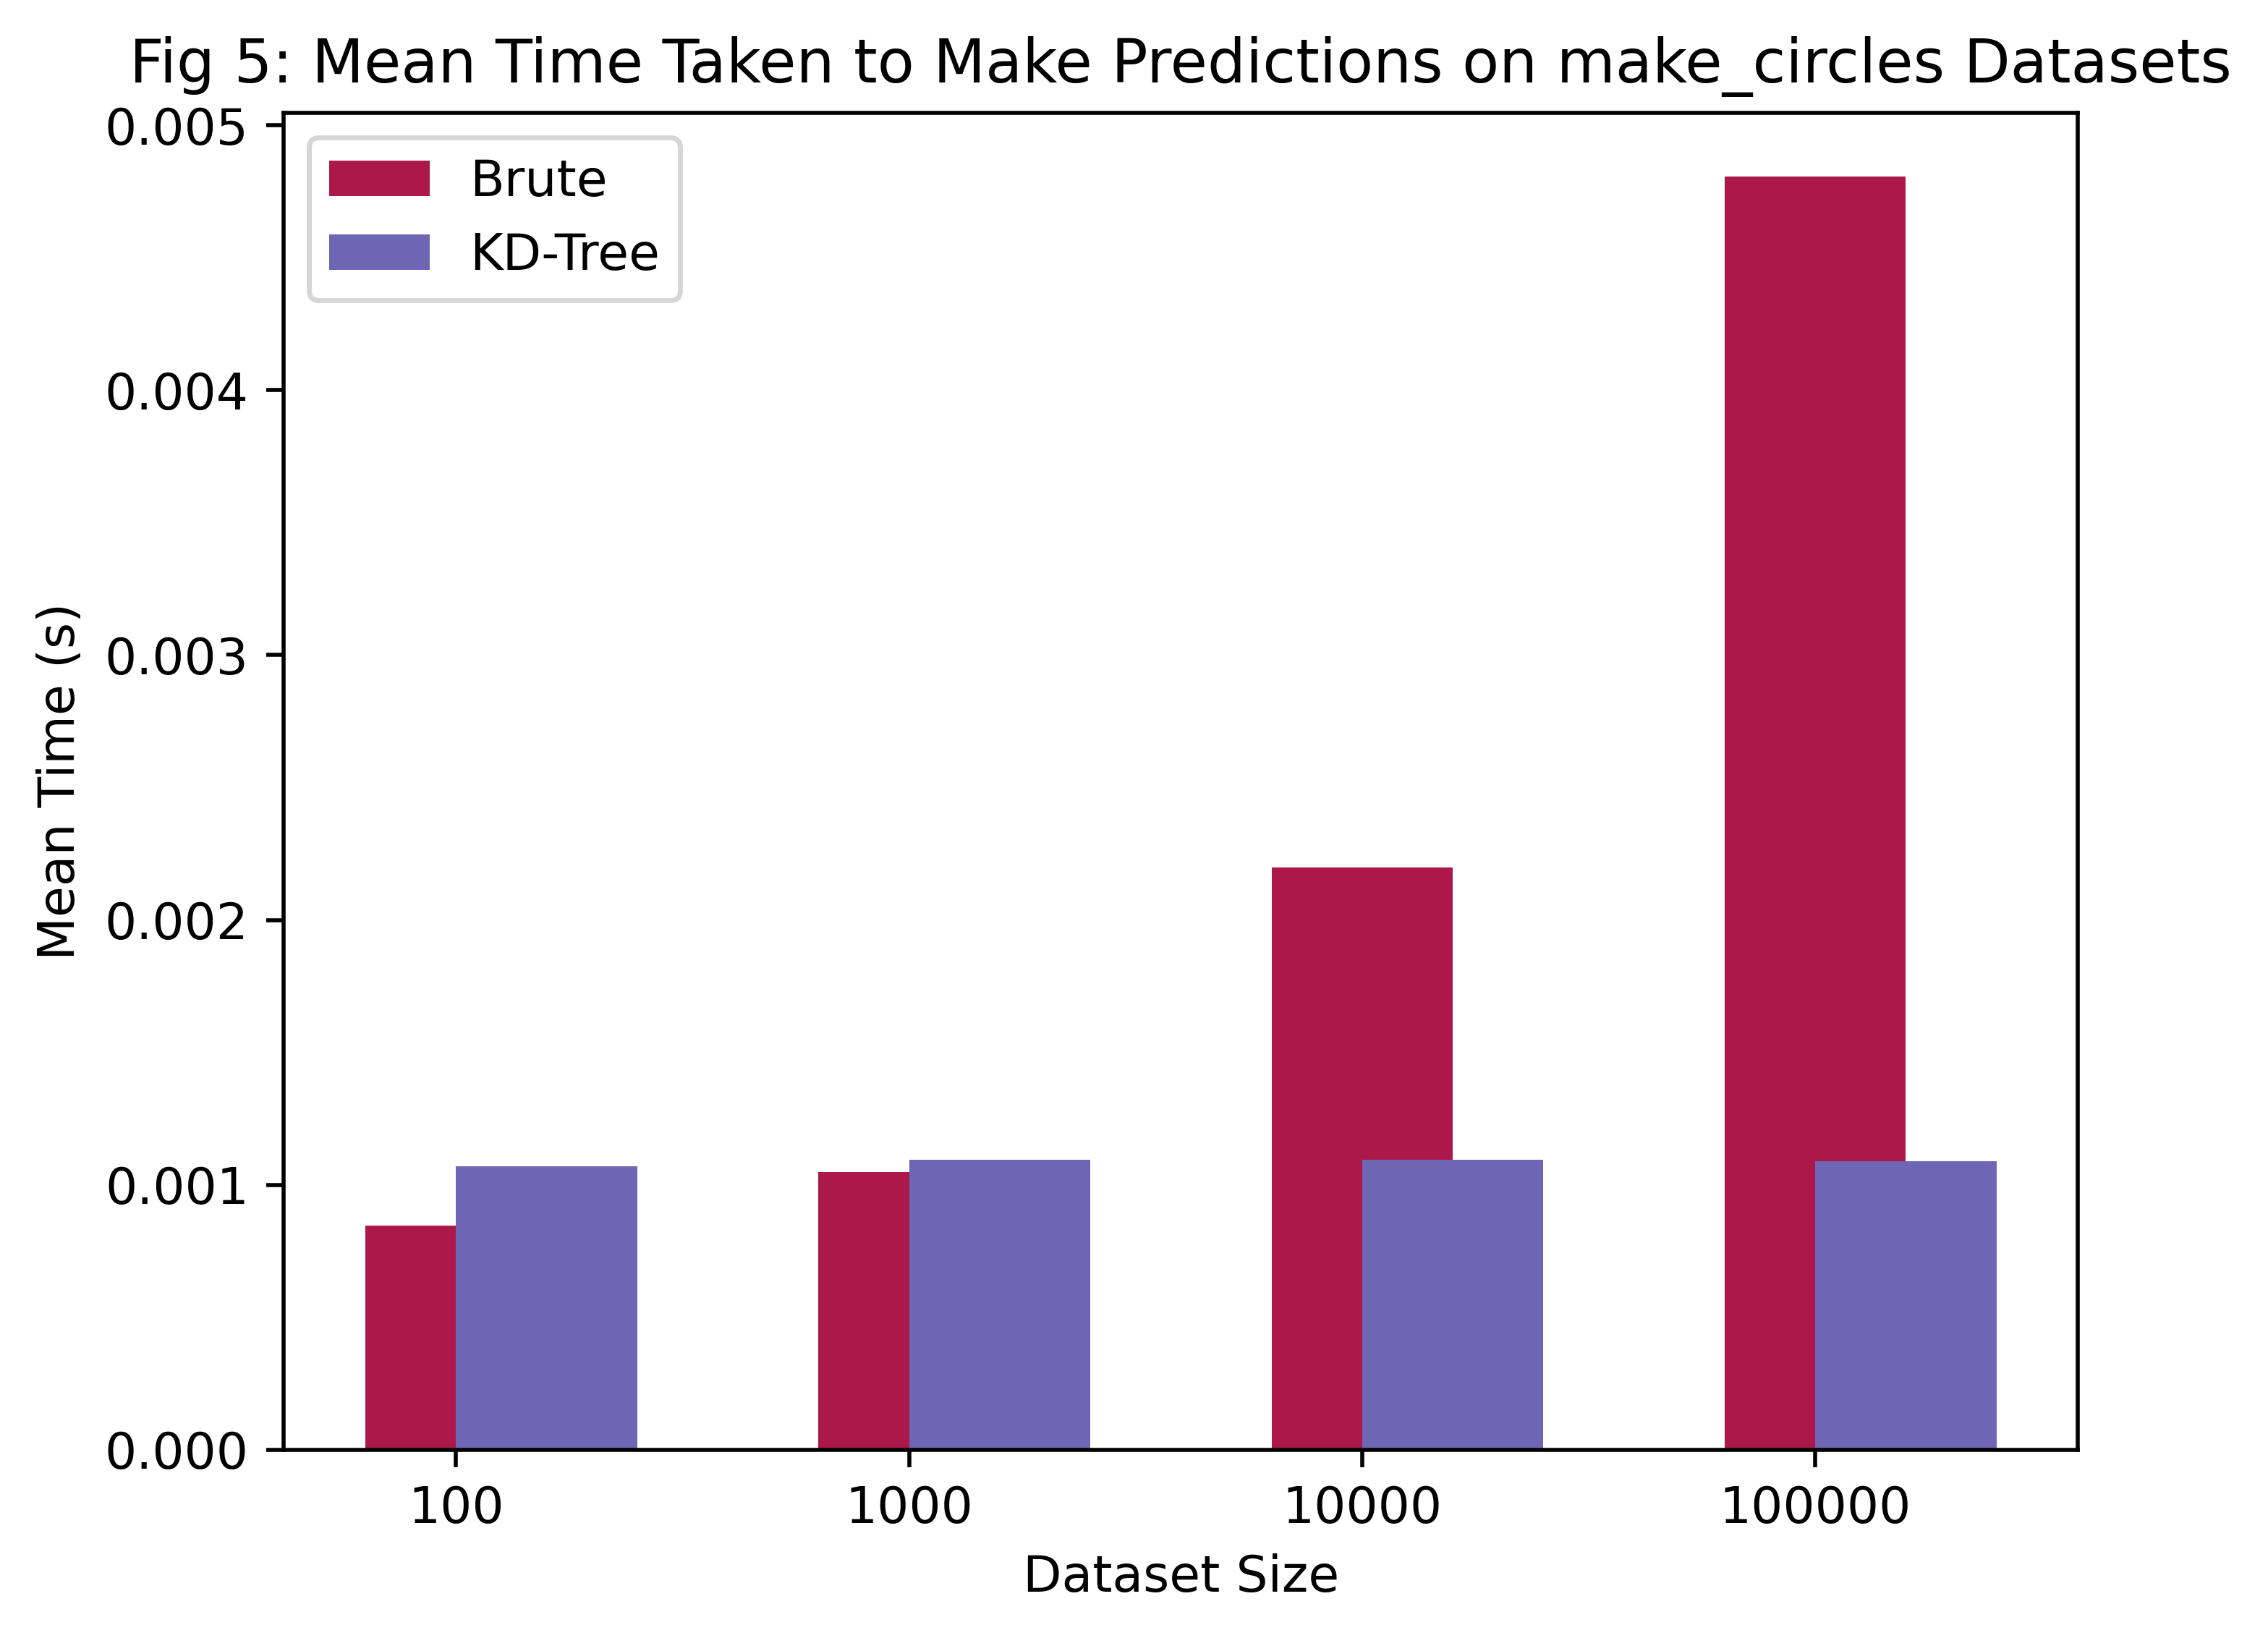

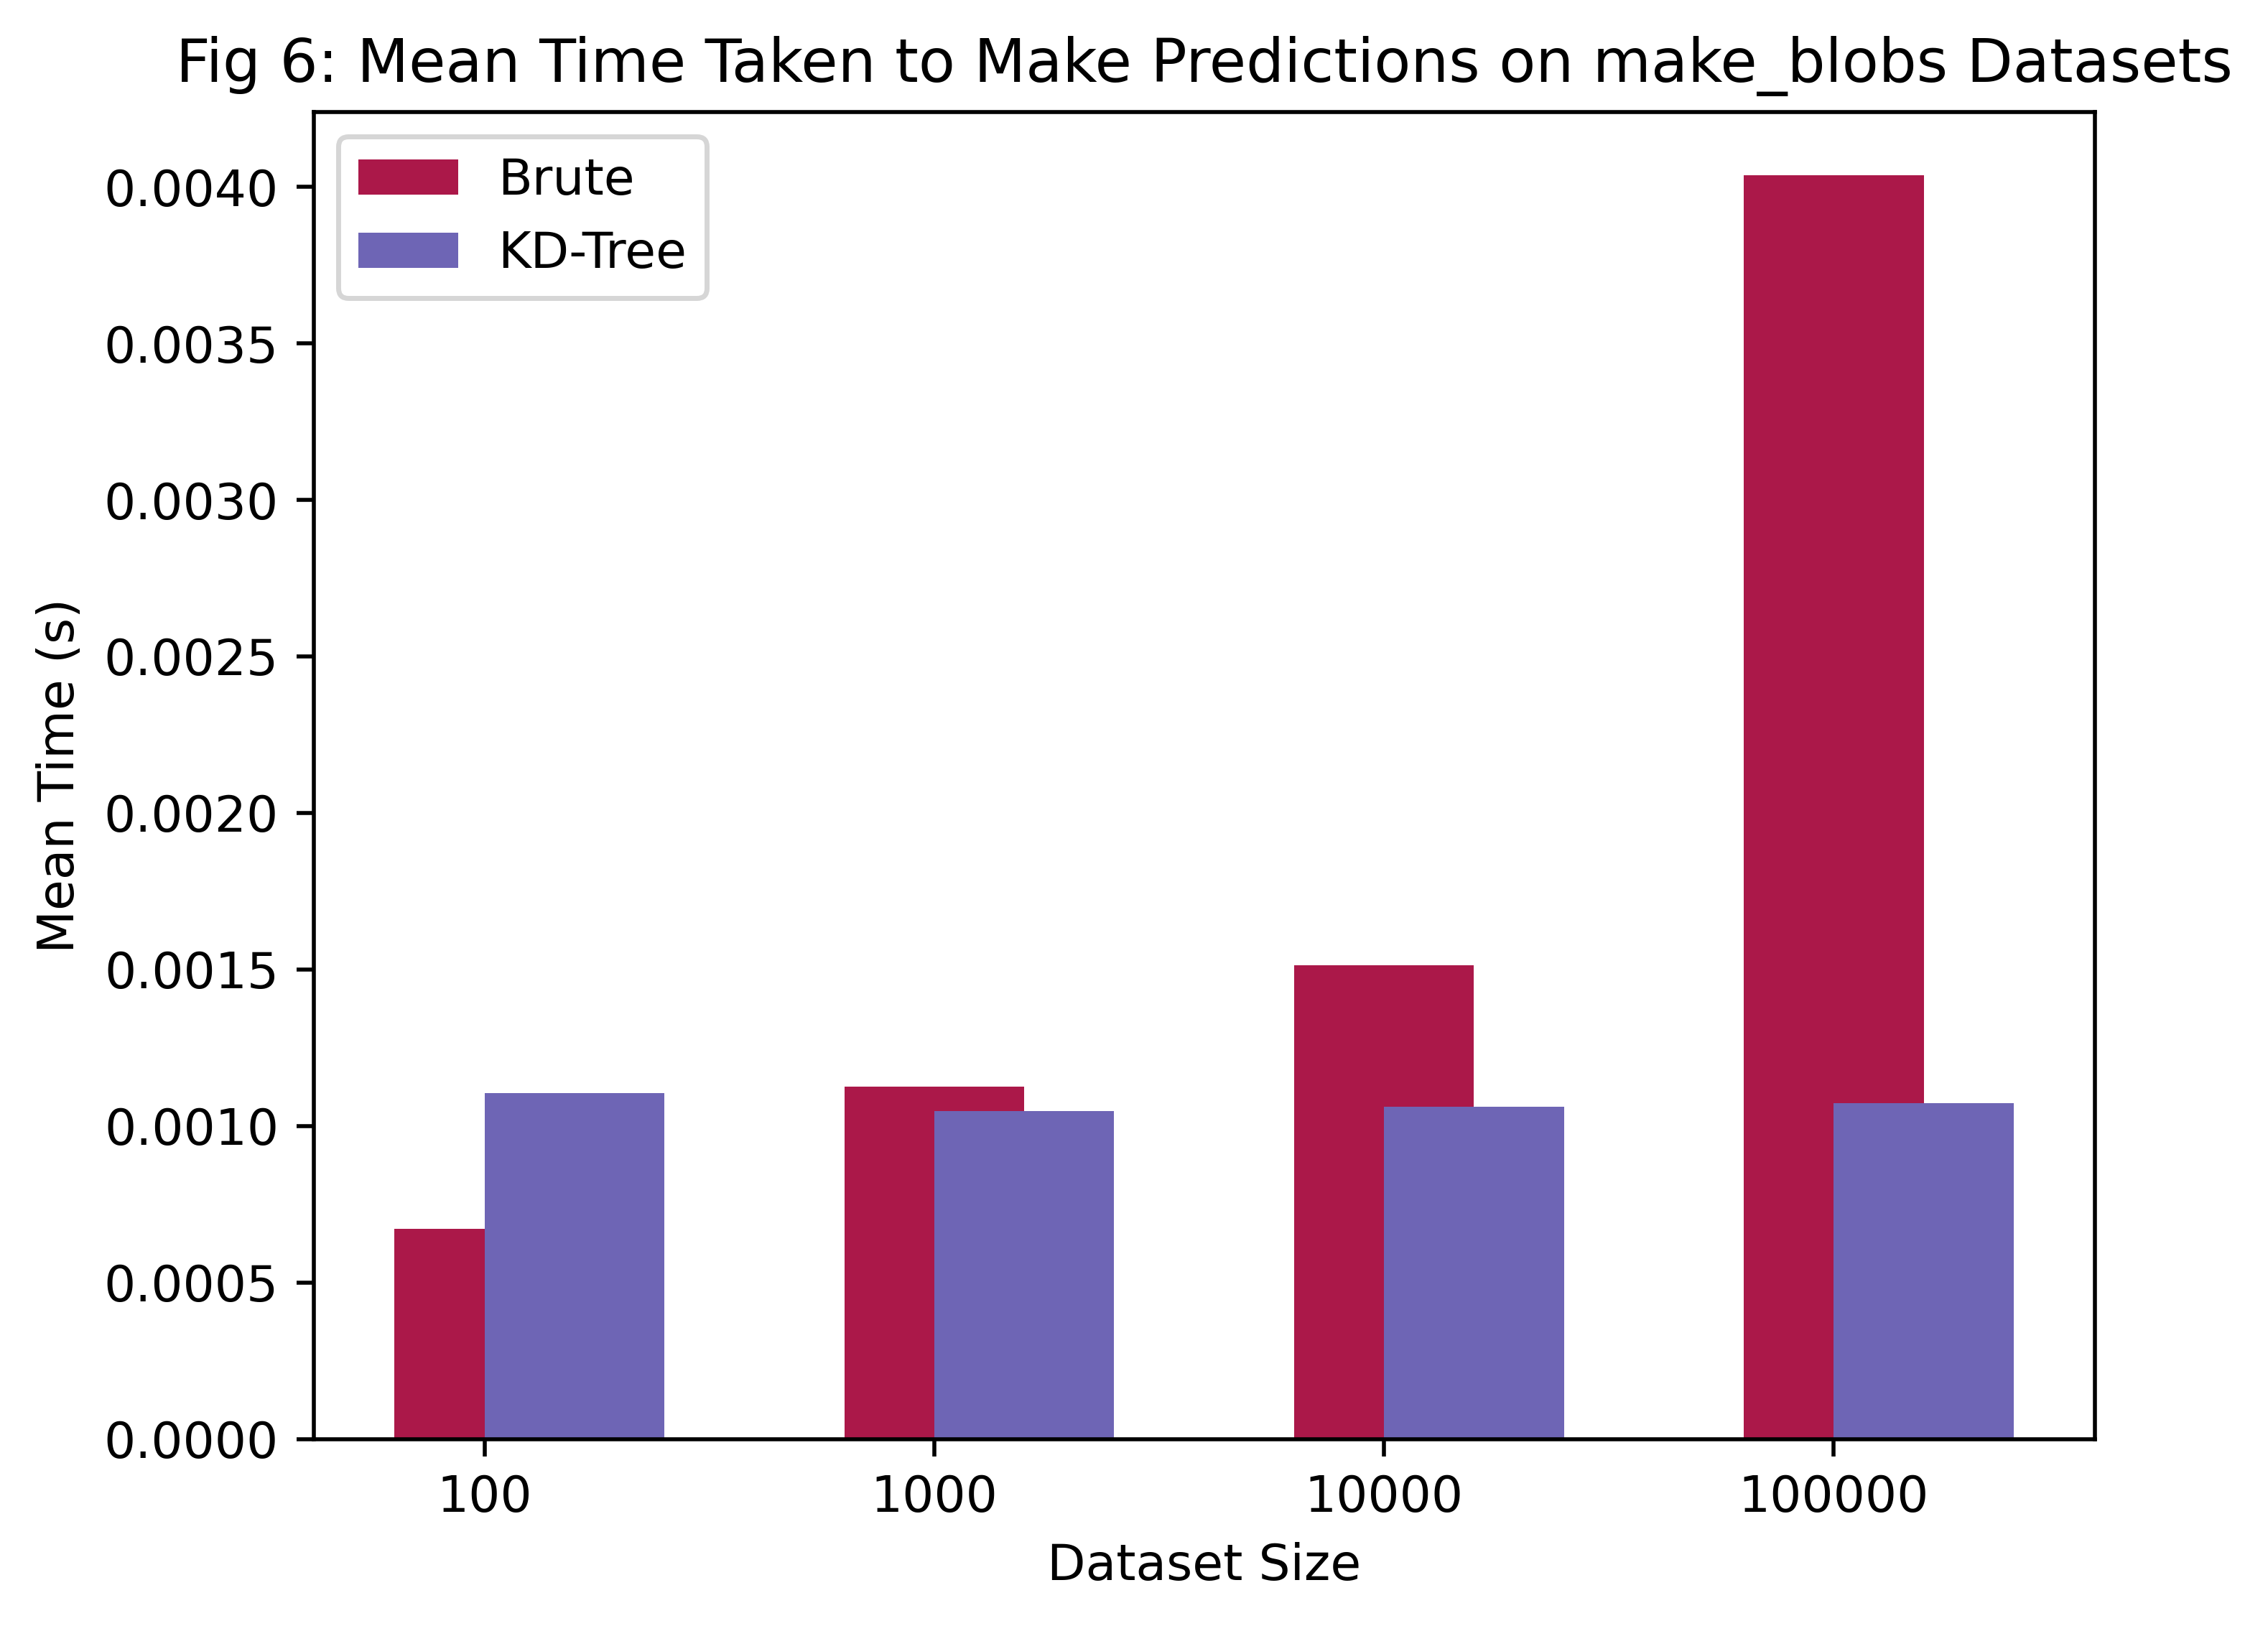

In [126]:
# Calculating the mean time

# Creating a dictionary to store the mean times for the make_circles datasets
mean_times_a = {}

# Calculating the mean time for each algorithm
for dataset in results_a:
    mean_times_a[dataset] = {
        'brute': np.mean(results_a[dataset]['brute']),
        'kd_tree': np.mean(results_a[dataset]['kd_tree'])
    }

# Creating a dictionary to store the mean times for the make_blobs datasets
mean_times_b = {}

# Calculating the mean time for each algorithm
for dataset in results_b:
    mean_times_b[dataset] = {
        'brute': np.mean(results_b[dataset]['brute']),
        'kd_tree': np.mean(results_b[dataset]['kd_tree'])
    }
 
# Plotting the mean times for the make_circles datasets           
fig, ax = plt.subplots(dpi=500)
ax.bar(range(len(mean_times_a.keys())), [mean_times_a[dataset]['brute'] for dataset in mean_times_a], width=0.4, label='Brute', align='center', color='#ab1849')
ax.bar(range(len(mean_times_a.keys())), [mean_times_a[dataset]['kd_tree'] for dataset in mean_times_a], width=0.4, label='KD-Tree', align='edge', color='#6e65b5')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Mean Time (s)')
ax.set_title('Fig 5: Mean Time Taken to Make Predictions on make_circles Datasets')
ax.set_xticks(range(len(mean_times_a.keys())))  
ax.set_xticklabels(mean_times_a.keys()) 
ax.legend()
plt.show()

# Plotting the mean times for the make_blobs datasets
fig, ax = plt.subplots(dpi=500)
ax.bar(range(len(mean_times_b.keys())), [mean_times_b[dataset]['brute'] for dataset in mean_times_b], width=0.4, label='Brute', align='center', color='#ab1849')
ax.bar(range(len(mean_times_b.keys())), [mean_times_b[dataset]['kd_tree'] for dataset in mean_times_b], width=0.4, label='KD-Tree', align='edge', color='#6e65b5')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Mean Time (s)')
ax.set_title('Fig 6: Mean Time Taken to Make Predictions on make_blobs Datasets')
ax.set_xticks(range(len(mean_times_b.keys())))
ax.set_xticklabels(mean_times_b.keys())
ax.legend()
plt.show()


In [127]:
# Print the mean times for the make_circles datasets
print("Mean Times for make_circles Datasets:")
for dataset in mean_times_a:
    print("Dataset Size:", dataset)
    print("Brute Force:", mean_times_a[dataset]['brute'])
    print("KD-Tree:", mean_times_a[dataset]['kd_tree'])
    print()

Mean Times for make_circles Datasets:
Dataset Size: 100
Brute Force: 0.0008465766906738282
KD-Tree: 0.0010692834854125976

Dataset Size: 1000
Brute Force: 0.001049208641052246
KD-Tree: 0.001094818115234375

Dataset Size: 10000
Brute Force: 0.002197885513305664
KD-Tree: 0.0010939836502075195

Dataset Size: 100000
Brute Force: 0.004808163642883301
KD-Tree: 0.0010899066925048827



In [128]:
# Print the mean times for the make_blobs datasets
print("Mean Times for make_blobs Datasets:")
for dataset in mean_times_b:
    print("Dataset Size:", dataset)
    print("Brute Force:", mean_times_b[dataset]['brute'])
    print("KD-Tree:", mean_times_b[dataset]['kd_tree'])
    print()

Mean Times for make_blobs Datasets:
Dataset Size: 100
Brute Force: 0.0006721973419189453
KD-Tree: 0.001104879379272461

Dataset Size: 1000
Brute Force: 0.001125168800354004
KD-Tree: 0.001047968864440918

Dataset Size: 10000
Brute Force: 0.0015135765075683593
KD-Tree: 0.0010605335235595703

Dataset Size: 100000
Brute Force: 0.0040377616882324215
KD-Tree: 0.0010720252990722655



Calculating the statistical significance of the results:

In [129]:
# Statistical significance test for the make_circles datasets
# Create a dictionary to store the p-values
p_values_a = {}

# Perform the statistical significance test
for dataset in results_a:
    p_values_a[dataset] = ttest_rel(results_a[dataset]['brute'], results_a[dataset]['kd_tree']).pvalue
    
# Print the p-values for the make_circles datasets
print("P-Values for make_circles Datasets:")
for dataset in p_values_a:
    print("Dataset Size:", dataset)
    print("P-Value:", p_values_a[dataset])
    if p_values_a[dataset] < 0.01:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")
    print()

P-Values for make_circles Datasets:
Dataset Size: 100
P-Value: 0.07388145093035489
The difference is not statistically significant.

Dataset Size: 1000
P-Value: 0.6029961164736539
The difference is not statistically significant.

Dataset Size: 10000
P-Value: 0.001915057353701511
The difference is statistically significant.

Dataset Size: 100000
P-Value: 4.724220554778451e-09
The difference is statistically significant.



In [130]:
# Statistical significance test for the make_blobs datasets
# Create a dictionary to store the p-values
p_values_b = {}

# Perform the statistical significance test
for dataset in results_b:
    p_values_b[dataset] = ttest_rel(results_b[dataset]['brute'], results_b[dataset]['kd_tree']).pvalue

# Print the p-values for the make_blobs datasets
print("P-Values for make_blobs Datasets:")
for dataset in p_values_b:
    print("Dataset Size:", dataset)
    print("P-Value:", p_values_b[dataset])
    if p_values_b[dataset] < 0.01:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")
    print()

P-Values for make_blobs Datasets:
Dataset Size: 100
P-Value: 0.0011497332418574065
The difference is statistically significant.

Dataset Size: 1000
P-Value: 0.5676934447597884
The difference is not statistically significant.

Dataset Size: 10000
P-Value: 0.02265665731458966
The difference is not statistically significant.

Dataset Size: 100000
P-Value: 3.5158202274233522e-06
The difference is statistically significant.



Minimum and maximum time taken for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` dataset: 


Maximum times for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` dataset:

In [131]:
# Print the maximum times for the make_circles datasets
print("Maximum Times for make_circles Datasets:")
for dataset in results_a:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.max(results_a[dataset]['brute']))
    print("KD-Tree:", np.max(results_a[dataset]['kd_tree']))
    print()

Maximum Times for make_circles Datasets:
Dataset Size: 100
Brute Force: 0.001489877700805664
KD-Tree: 0.0012269020080566406

Dataset Size: 1000
Brute Force: 0.0015921592712402344
KD-Tree: 0.0012578964233398438

Dataset Size: 10000
Brute Force: 0.004335165023803711
KD-Tree: 0.0013260841369628906

Dataset Size: 100000
Brute Force: 0.005716085433959961
KD-Tree: 0.0014200210571289062



In [132]:
# Print the maximum times for the make_blobs datasets
print("Maximum Times for make_blobs Datasets:")
for dataset in results_b:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.max(results_b[dataset]['brute']))
    print("KD-Tree:", np.max(results_b[dataset]['kd_tree']))
    print()

Maximum Times for make_blobs Datasets:
Dataset Size: 100
Brute Force: 0.0014789104461669922
KD-Tree: 0.0013508796691894531

Dataset Size: 1000
Brute Force: 0.002065896987915039
KD-Tree: 0.001245737075805664

Dataset Size: 10000
Brute Force: 0.002724885940551758
KD-Tree: 0.0012471675872802734

Dataset Size: 100000
Brute Force: 0.005754709243774414
KD-Tree: 0.001322031021118164



Minimum times for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` dataset:

In [133]:
# Print the minimum times for the make_circles datasets
print("Minimum Times for make_circles Datasets:")
for dataset in results_a:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.min(results_a[dataset]['brute']))
    print("KD-Tree:", np.min(results_a[dataset]['kd_tree']))
    print()

Minimum Times for make_circles Datasets:
Dataset Size: 100
Brute Force: 0.0004527568817138672
KD-Tree: 0.0009768009185791016

Dataset Size: 1000
Brute Force: 0.0007469654083251953
KD-Tree: 0.0010192394256591797

Dataset Size: 10000
Brute Force: 0.0015988349914550781
KD-Tree: 0.001032114028930664

Dataset Size: 100000
Brute Force: 0.003922939300537109
KD-Tree: 0.0010280609130859375



In [134]:
# Print the minimum times for the make_circles datasets
print("Minimum Times for make_blobs Datasets:")
for dataset in results_b:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.min(results_b[dataset]['brute']))
    print("KD-Tree:", np.min(results_b[dataset]['kd_tree']))
    print()

Minimum Times for make_blobs Datasets:
Dataset Size: 100
Brute Force: 0.0003829002380371094
KD-Tree: 0.0009889602661132812

Dataset Size: 1000
Brute Force: 0.0007030963897705078
KD-Tree: 0.0010046958923339844

Dataset Size: 10000
Brute Force: 0.0009388923645019531
KD-Tree: 0.001020193099975586

Dataset Size: 100000
Brute Force: 0.003098011016845703
KD-Tree: 0.0010089874267578125



Calculating the standard deviation for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` dataset:

In [135]:
# Print the standard deviations for the make_circles datasets
print("Standard Deviations for make_circles Datasets:")
for dataset in results_a:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.std(results_a[dataset]['brute']))
    print("KD-Tree:", np.std(results_a[dataset]['kd_tree']))
    print()

Standard Deviations for make_circles Datasets:
Dataset Size: 100
Brute Force: 0.0003396497856552481
KD-Tree: 8.34335214872068e-05

Dataset Size: 1000
Brute Force: 0.0003042558134548527
KD-Tree: 8.187468965112897e-05

Dataset Size: 10000
Brute Force: 0.000781274286769014
KD-Tree: 8.99093658618649e-05

Dataset Size: 100000
Brute Force: 0.0005430276372887126
KD-Tree: 0.0001134700221130038



In [136]:
# Print the standard deviations for the make_blobs datasets
print("Standard Deviations for make_blobs Datasets:")
for dataset in results_b:
    print("Dataset Size:", dataset)
    print("Brute Force:", np.std(results_b[dataset]['brute']))
    print("KD-Tree:", np.std(results_b[dataset]['kd_tree']))
    print()

Standard Deviations for make_blobs Datasets:
Dataset Size: 100
Brute Force: 0.0003239421266344795
KD-Tree: 0.00012049019248096509

Dataset Size: 1000
Brute Force: 0.0004086231543998836
KD-Tree: 7.029510113614593e-05

Dataset Size: 10000
Brute Force: 0.00048416278121998866
KD-Tree: 6.581292569043958e-05

Dataset Size: 100000
Brute Force: 0.0008638071887211951
KD-Tree: 9.222141588681751e-05



## (c) Discussion of Experimental Results

The results from the experiment seem to align with theoretical analysis. The theoretical expections for the brute-search method is that the time will increase linearly with the size of the training data, with a time complexity of $O(n)$, whereas the KD-tree search method is expected to increase logarithmically with the size of the training data, with a time complexity of $O(log_2(n))$ [2]. 

As can be observed from Fig 5 and Fig 6, the mean time taken by the by the brute search method increases as the size of the training data increases for both the `make_circles` and `make_blobs` datasets, and this is particularly visible for the datasets with 100,000 samples. On the other hand, the kd-tree search method shows a consistent time taken to make predictions across all training set sizes for both the `make_circles` and `make_blobs` datasets. For the `make_circles` dataset, the time taken to make predictions using the KD-tree search method is lower than the time taken using the brute-force search method for the 10,000 and 100,000 training set sizes. The time for the 100 and 1000 training set sizes is higher for the KD-tree search method compared to the brute-force search method, however the difference is not statistically significant. For the `make_blobs` dataset, the time taken to make predictions using the KD-tree search method is lower than the time taken using the brute-force search method for all training set sizes except for the 10,000 training set size, but only statistically significant for the 100,000 training set size. 

A similar trend can be observed when considering the minimum and maximum times taken for the brute-force and KD-tree search methods for the `make_circles` and `make_blobs` datasets. The minimum and maximum times taken for the KD-tree search method are lower than the brute-force search method and the prediction times for the KD-tree search method are remain consistent across the different training set sizes, while the prediction times for the brute-force search method increase as the training set size increases.

Furthermore, the standard deviation of the time taken for the KD-tree search method is lower than the brute-force search method for both the `make_circles` and `make_blobs` datasets. This indicates that the KD-tree search method is has less variabilty in terms of the time taken to make predictions compared to the brute-force search method. This aligns with the theoretical expectation that the KD-tree search method is more efficient and consistent, as the data is expected to be well-distributed.

Overall, the results corroborate theoretical analysis that the KD-tree search method is more efficient and has a lower time complexity compared to the brute-force search method. The KD-tree search method was more efficient for larger training datasets since the time taken to make predictions is consistent and did not increase significantly as the size of the training data increased, likely due to the tree structure of the KD-tree search method, which supports theoretical expectations. The brute-force search method, on the other hand, had a linear time complexity and the time taken to make predictions increased as the size of the training data increased. For the lower training set sizes, the time taken to make predictions, the difference in time taken was less noticeable, which may be due to the overhead of building the tree structure for the KD-tree search method and time time difference not being large enough to be statistically significant at smaller sizes.

References:
- [1] “Scikit-learn: Machine Learning in Python.” Scikit-learn. https://scikit-learn.org/stable/index.html.
- [2] J.D. Kelleher, B. Mac Namee and A. D’Arcy, “Fundamentals of Machine Learning for Predictive Data Analytics”, MIT Press.
- [3] “Unit Testing Python – Unittest.” GeeksforGeeks. https://www.geeksforgeeks.org/unit-testing-python-unittest/. 


